# Analyse du jeu de données

Source : https://world.openfoodfacts.org/data

Détails : https://world.openfoodfacts.org/data/data-fields.txt

Generalities:

- fields that end with **_t** are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)
- fields that end with **_datetime** are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
- fields that end with **_tags** are comma separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)
- fields that end with a **language 2 letter code** (e.g. fr for French) is the set of tags in that language
- fields that end with **_100g** correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product
- fields that end with **_serving** correspond to the amount of a nutriment (in g, or kJ for energy) for 1 serving of the product

NUTRISCORE : https://fr.openfoodfacts.org/nutriscore

NOVA : https://fr.openfoodfacts.org/nova Classification en 4 groupes pour mettre en évidence le degré de transformation des aliments

PNNS : https://www.mangerbouger.fr/PNNS/Le-PNNS/Qu-est-ce-que-le-PNNS
https://pepswork.com/2018/07/16/nouvelles-recommandations-nutritionnelles-du-pnns-2018-2022/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('OFF_cleaned.csv',sep='\t',encoding='utf-8')

In [4]:
pd.set_option('display.max_rows', None) #Visualiser le maximum possible d'information
pd.set_option('display.max_columns', None) #Visualiser le maximum possible d'information
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18967 entries, 0 to 18966
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     18967 non-null  object 
 1   url                                      18967 non-null  object 
 2   creator                                  18966 non-null  object 
 3   created_datetime                         18967 non-null  object 
 4   last_modified_datetime                   18967 non-null  object 
 5   product_name                             18967 non-null  object 
 6   quantity                                 18967 non-null  object 
 7   packaging                                18967 non-null  object 
 8   packaging_tags                           18967 non-null  object 
 9   brands                                   18967 non-null  object 
 10  brands_tags                              18966

In [5]:
data.shape

(18967, 60)

In [6]:
data.sample(5)

code                                                url  \
13389  3522920004465  http://world-en.openfoodfacts.org/product/3522...   
12437  3417881212274  http://world-en.openfoodfacts.org/product/3417...   
328    2000000069103  http://world-en.openfoodfacts.org/product/2000...   
13726  3560070350858  http://world-en.openfoodfacts.org/product/3560...   
3302   3192370086375  http://world-en.openfoodfacts.org/product/3192...   

          creator      created_datetime last_modified_datetime  \
13389  frenchhope  2016-06-11T10:17:02Z   2019-04-28T19:52:40Z   
12437     kiliweb  2018-02-16T19:51:48Z   2020-04-25T16:30:02Z   
328      sebleouf  2018-06-03T15:16:42Z   2018-06-06T20:32:52Z   
13726  miles67off  2014-05-12T15:55:35Z   2017-03-23T13:24:18Z   
3302   miles67off  2015-04-14T20:16:43Z   2018-08-30T22:29:20Z   

                               product_name                 quantity  \
13389          Thon blanc germon au naturel  200 g (égoutté : 140 g)   
12437                     L'Enrobé Airelles                     80 g   
328                          Château Lafoux                    75 cl   
13726  Pousses de Haricots Mungo (soja) Bio    330 g (175 g égoutté)   
3302            Vin Bordeaux rouge Yvecourt                      3 L   

                         packaging               packaging_tags  \
13389               Conserve,Métal               conserve,metal   
12437                Pot,Plastique                pot,plastique   
328                verre,bouteille              verre,bouteille   
13726  bocal verre,couvercle métal  bocal-verre,couvercle-metal   
3302                    carton,bib                   carton,bib   

                        brands              brands_tags  \
13389            Capitane Nat'             capitane-nat   
12437              Sans marque              sans-marque   
328        SCEA Château Lafoux      scea-chateau-lafoux   
13726  Carrefour,Carrefour Bio  carrefour,carrefour-bio   
3302                  Yvecourt                 yvecourt   

                                              categories  \
13389  Conserves, Produits de la mer, Poissons, Poiss...   
12437  Produits laitiers, Produits fermentés, Produit...   
328    Boissons, Boissons alcoolisées, Vins, Vins fra...   
13726  Aliments et boissons à base de végétaux, Alime...   
3302   Boissons, Boissons alcoolisées, Vins, Vins rou...   

                                         categories_tags  \
13389  en:canned-foods,en:seafood,en:fishes,en:canned...   
12437  en:dairies,en:fermented-foods,en:fermented-mil...   
328    en:beverages,en:alcoholic-beverages,en:wines,e...   
13726  en:plant-based-foods-and-beverages,en:plant-ba...   
3302   en:beverages,en:alcoholic-beverages,en:wines,e...   

                                           categories_en  \
13389  Canned foods,Seafood,Fishes,Canned fishes,Tuna...   
12437  Dairies,Fermented foods,Fermented milk product...   
328    Beverages,Alcoholic beverages,Wines,Wines from...   
13726  Plant-based foods and beverages,Plant-based fo...   
3302   Beverages,Alcoholic beverages,Wines,Red wines,...   

                                                  labels  \
13389  Informations incorrectes sur l'emballage,Infor...   
12437                                                NaN   
328    Bio, Bio européen, Contient des sulfites, FR-B...   
13726  Bio, Bio européen, Fabriqué en France, AB Agri...   
3302                      Appellation Bordeaux Contrôlée   

                                             labels_tags  \
13389  en:incorrect-data-on-label,en:incorrect-nutrit...   
12437                                                NaN   
328    en:organic,en:eu-organic,en:fr-bio-01,en:green...   
13726  en:organic,en:eu-organic,en:made-in-france,fr:...   
3302                   fr:appellation-bordeaux-controlee   

                                               labels_en  \
13389  Incorrect data on label,Incorrect nutrition fa...   
12437                                               

In [7]:
data.select_dtypes(include=['int64','float64']).describe()

serving_quantity   additives_n  ingredients_from_palm_oil_n  \
count      10152.000000  18967.000000                 18967.000000   
mean         120.299456      1.919492                     0.022566   
std          113.010546      2.481271                     0.148872   
min            0.000000      0.000000                     0.000000   
25%           37.500000      0.000000                     0.000000   
50%          100.000000      1.000000                     0.000000   
75%          150.000000      3.000000                     0.000000   
max         1500.000000     30.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n  nutriscore_score  \
count                             18967.000000      16934.000000   
mean                                  0.116782          8.261131   
std                                   0.394677          8.440737   
min                                   0.000000        -14.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000          6.000000   
75%                                   0.000000         15.000000   
max                                   5.000000         29.000000   

         nova_group  energy-kcal_100g   energy_100g      fat_100g  \
count  18290.000000      17627.000000  17627.000000  17690.000000   
mean       3.429852        230.864964    963.761186     13.965616   
std        0.908237        154.586568    641.578433     15.310006   
min        1.000000          0.000000      0.000000      0.000000   
25%        3.000000        113.000000    473.000000      3.000000   
50%        4.000000        198.613770    830.000000      8.900000   
75%        4.000000        320.992350   1339.000000     21.000000   
max        4.000000       1440.000000   3916.000000    100.000000   

       saturated-fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count        17428.000000        17592.000000  17416.000000  17398.000000   
mean             6.212180           15.225943      6.935903      2.380004   
std              8.450896           20.336711     12.807798      2.347875   
min              0.000000            0.000000      0.000000      0.000000   
25%              0.900000            1.000000      0.500000      1.000000   
50%              2.700000            6.000000      1.800000      2.940669   
75%              8.700000           19.200000      5.900000      2.940669   
max             80.000000          100.000000    100.000000     85.000000   

       proteins_100g     salt_100g   sodium_100g  quantity_value  \
count   17613.000000  17402.000000  17402.000000    18697.000000   
mean       10.691363      1.187913      0.477986      370.109393   
std         8.297984      2.234305      0.969327      345.560793   
min         0.000000      0.000000      0.000000        0.000000   
25%         3.900000      0.170000      0.068000      160.000000   
50%         8.200000      0.900000      0.360000      250.000000   
75%        17.000000      1.600000      0.640000      450.000000   
max        73.000000    100.000000     49.987200     3000.000000   

       ingredients_q  
count   18967.000000  
mean        7.683187  
std         6.541858  
min         0.000000  
25%         3.000000  
50%         6.000000  
75%        11.000000  
max        88.000000

## Analyse univariée

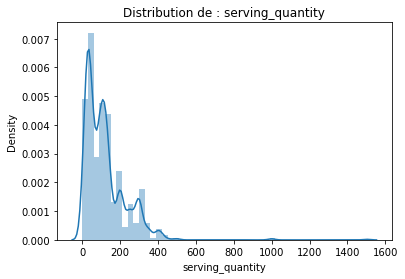

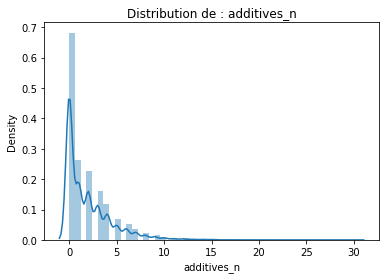

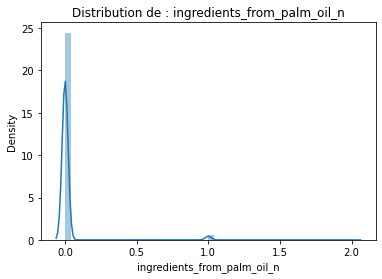

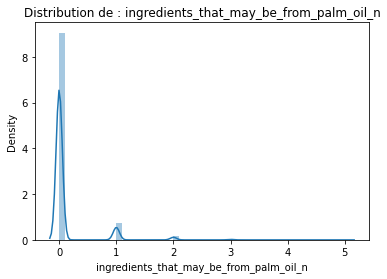

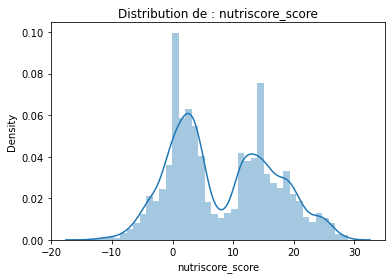

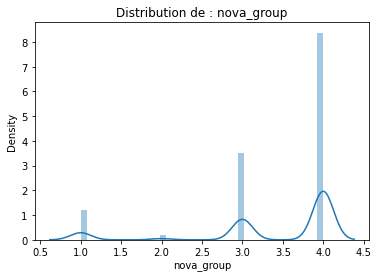

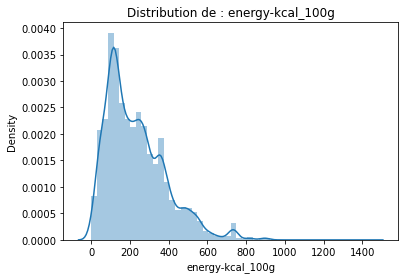

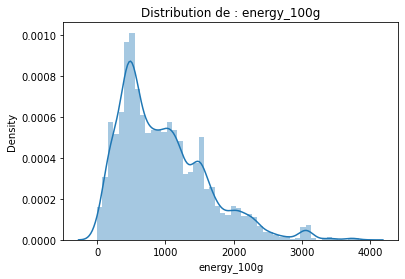

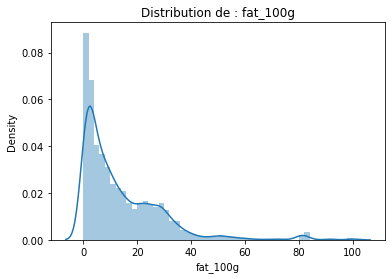

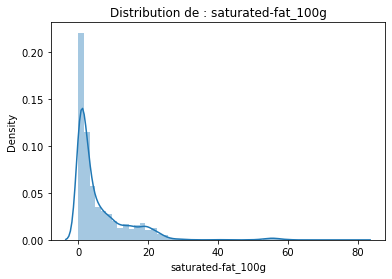

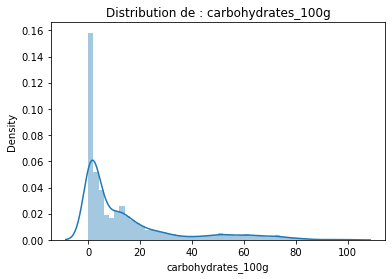

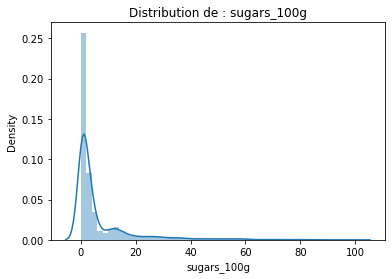

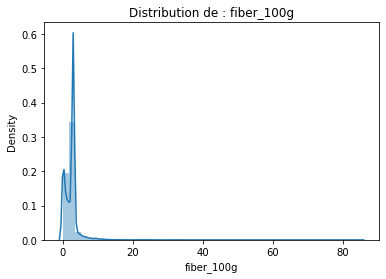

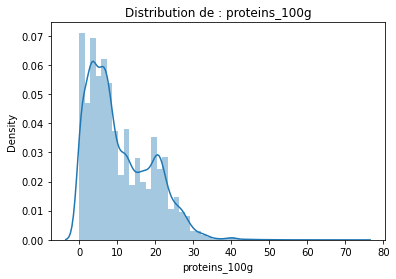

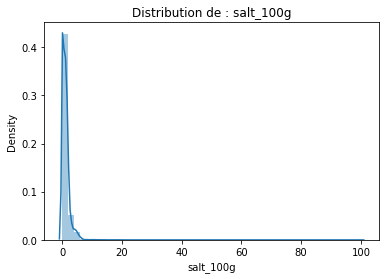

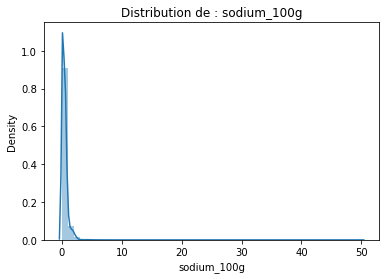

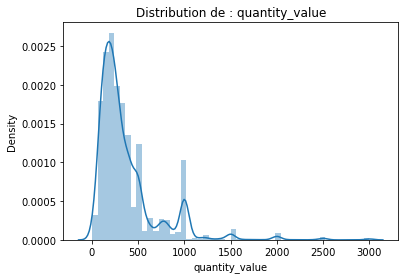

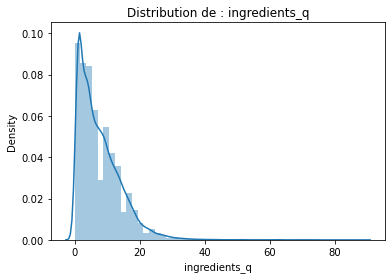

In [8]:
numCols = data.select_dtypes(include=['int64','float64']).columns
for numCol in numCols:
    title = 'Distribution de : ' + numCol
    sns.distplot(data[numCol])
    plt.title(title)
    plt.xlabel(numCol)
    plt.show()

On peut observer que certaines variables sont discrètes :
- additives_n
- ingredients_from_palm_oil_n
- ingredients_that_may_be_from_palm_oil_n
- nutriscore_score
- nova_group
- ingredients_q

Aussi, on peut observer que certaines variables ont une distribution très similaires :
- energy-kcal_100g et energy_100g
- salt_100g et sodium_100g
- carbohydrates_100g et sugars_100g
- fat_100g et saturated-fat_100g

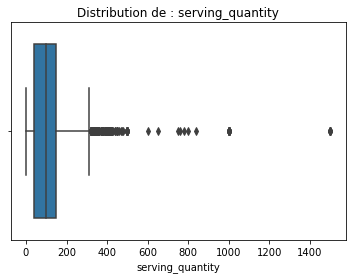

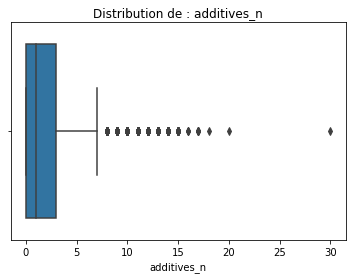

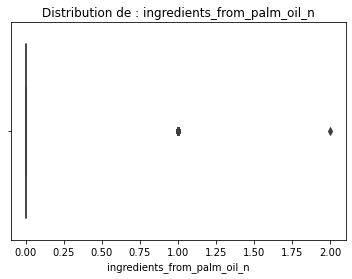

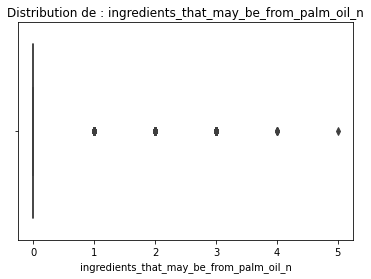

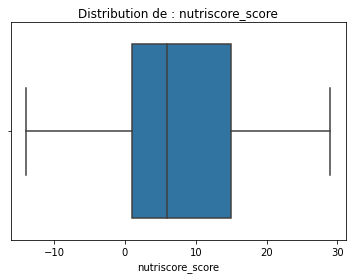

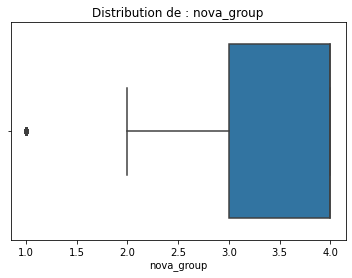

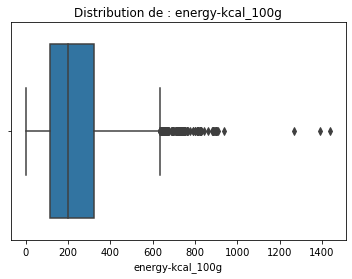

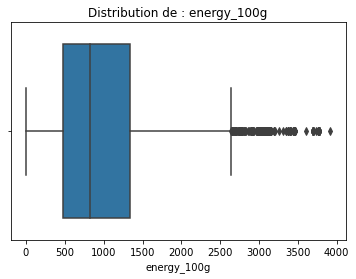

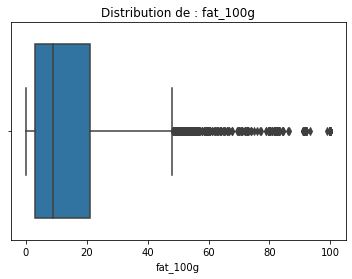

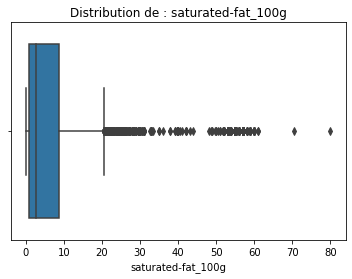

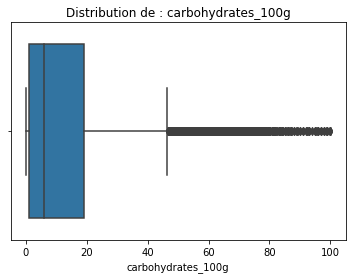

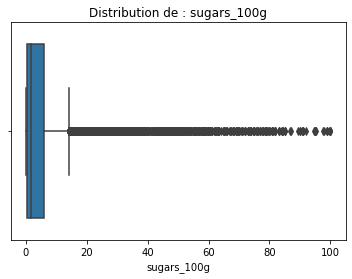

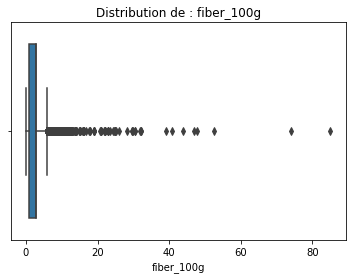

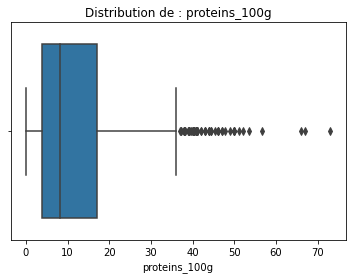

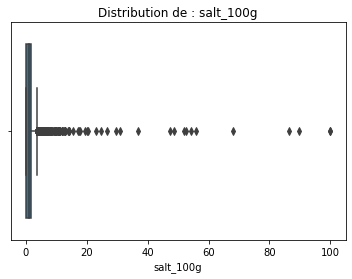

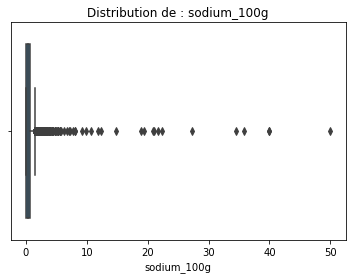

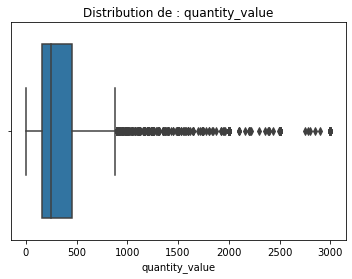

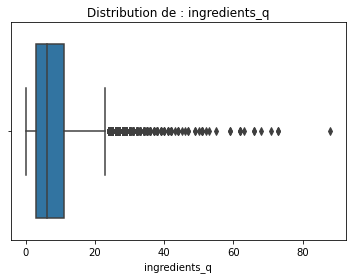

In [9]:
for numCol in numCols:
    title = 'Distribution de : ' + numCol
    sns.boxplot(data[numCol])
    plt.title(title)
    plt.xlabel(numCol)
    plt.show()

Test de normalité avec Boxplot : les variables ne semblent pas suivre la loi normale.

Source : https://fr.wikipedia.org/wiki/Test_de_normalit%C3%A9

In [10]:
objCols = data.select_dtypes(include=['object']).columns
objCols

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'labels', 'labels_tags', 'labels_en', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'serving_size', 'additives_tags', 'additives_en', 'nutriscore_grade',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'main_category_en', 'image_url',
       'image_ingredients_url', 'image_nutrition_url', 'created',
       'last_modified', 'quantity_unit', 'ingredients_list', 'ingredients'],
      dtype='object')

In [11]:
numCols

Index(['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'quantity_value',
       'ingredients_q'],
      dtype='object')

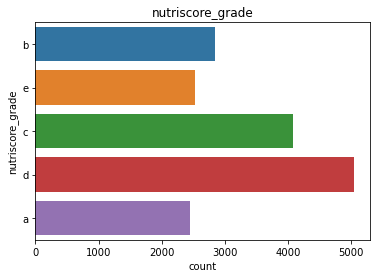

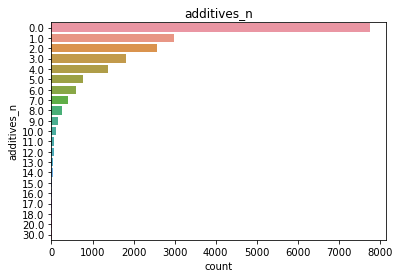

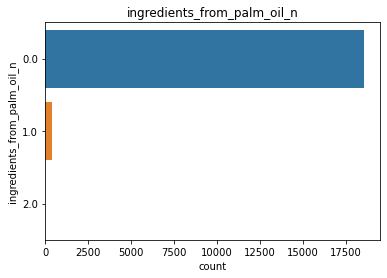

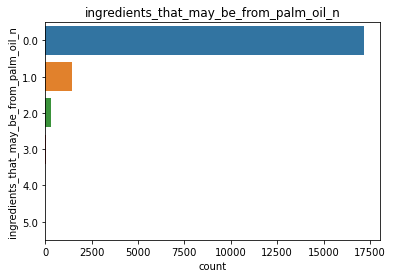

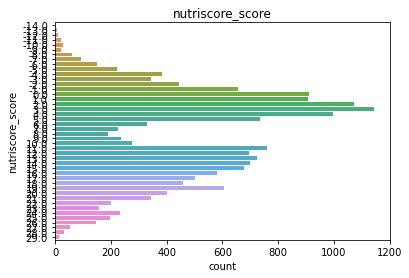

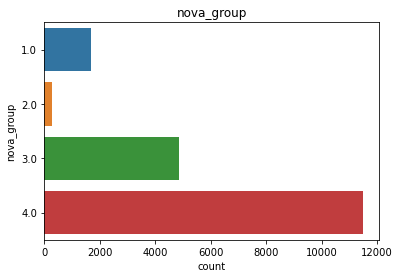

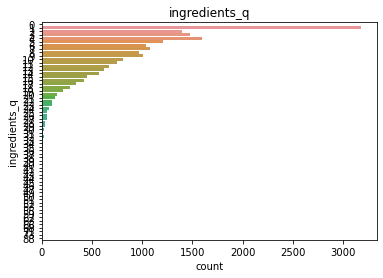

In [12]:
graphCols = ['nutriscore_grade', 'additives_n', 'ingredients_from_palm_oil_n', 
             'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nova_group', 
             'ingredients_q']

for col in graphCols:
    g = sns.countplot(y=data[col],data=data)
    #g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')
    plt.title(col)
    plt.show()
    #print('')

Distribution des valeurs de Nutriscore et Nova groups.

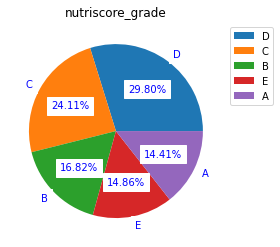

In [13]:
plt.title('nutriscore_grade')
wedges, texts, autotexts = plt.pie(data.nutriscore_grade.value_counts().values,
                                   labels=data.nutriscore_grade.value_counts().index.str.upper(),
                                   autopct='%1.2f%%', textprops={'color':'b',
                                                                'backgroundcolor':'w'})
ax = plt.gca()
legend = ax.legend(wedges,data.nutriscore_grade.value_counts().index.str.upper(),bbox_to_anchor=(1,1))

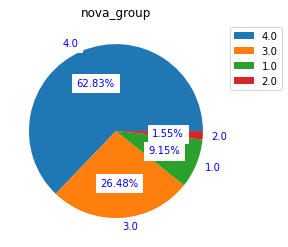

In [14]:
plt.title('nova_group')
wedges, texts, autotexts = plt.pie(data.nova_group.value_counts().values,
                                   labels=data.nova_group.value_counts().index,
                                   autopct='%1.2f%%', textprops={'color':'b',
                                                                'backgroundcolor':'w'})
ax = plt.gca()
legend = ax.legend(wedges,data.nova_group.value_counts().index,bbox_to_anchor=(1,1))

Répétition des strings :

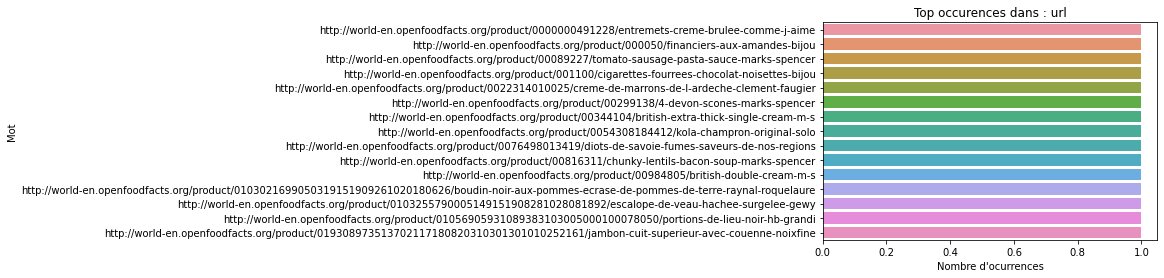

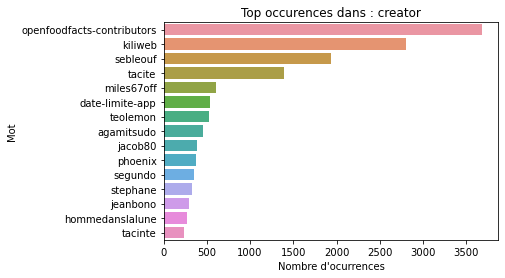

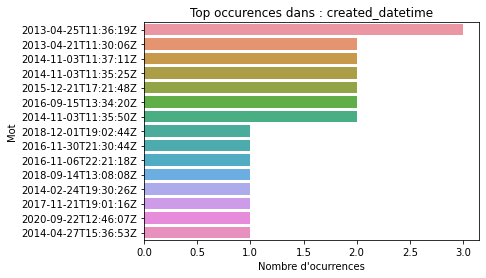

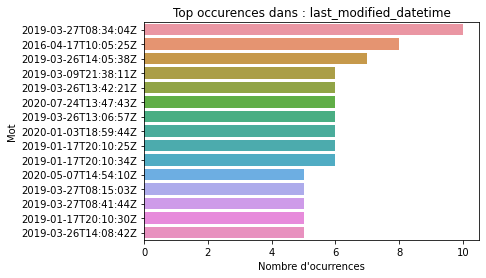

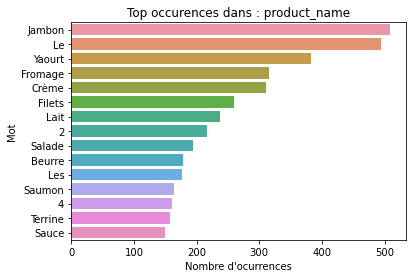

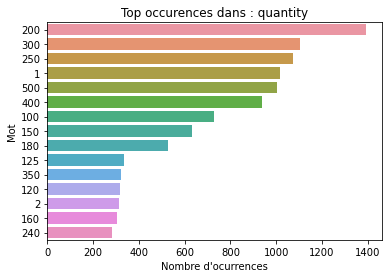

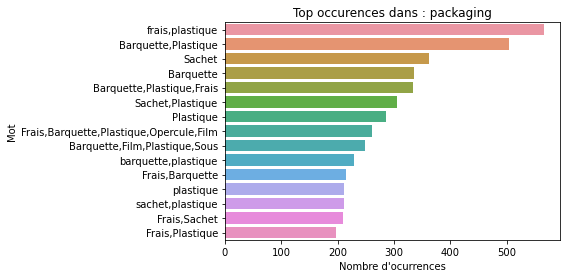

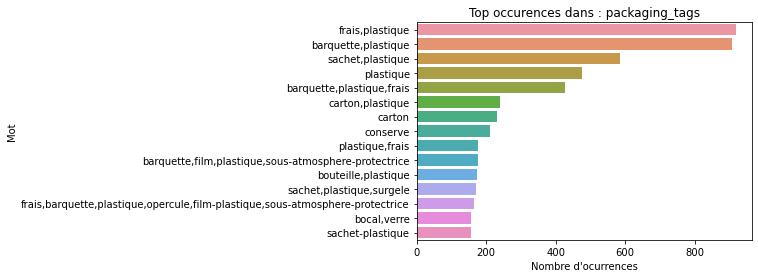

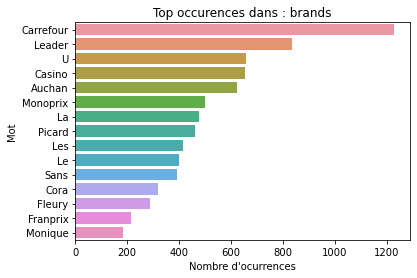

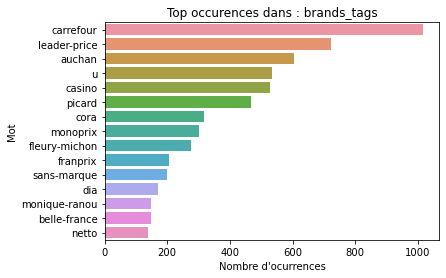

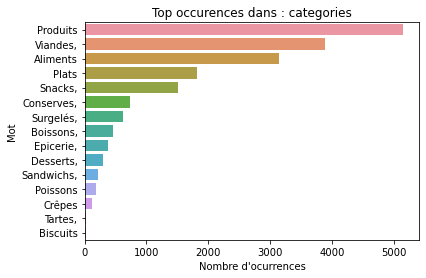

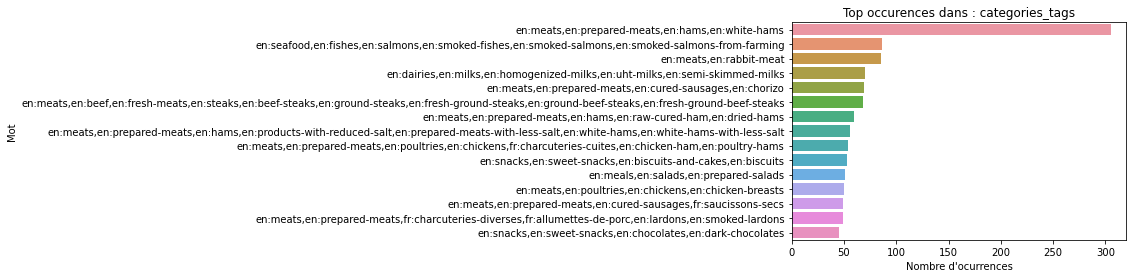

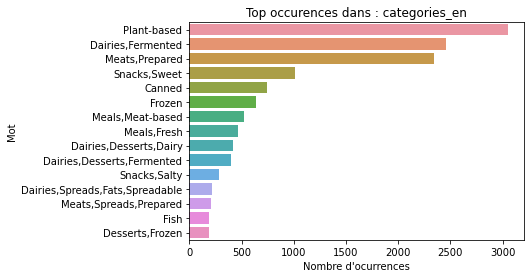

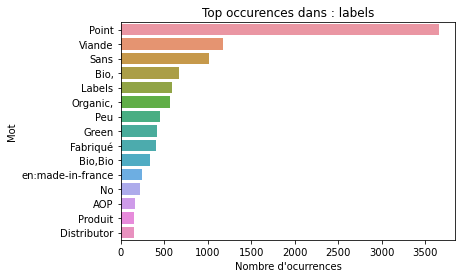

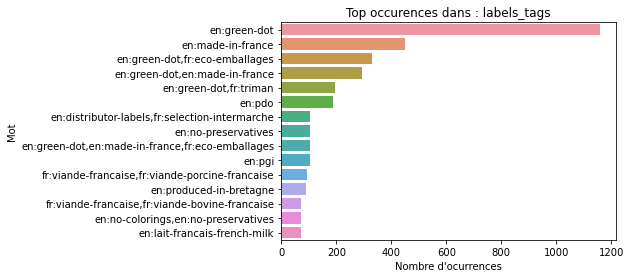

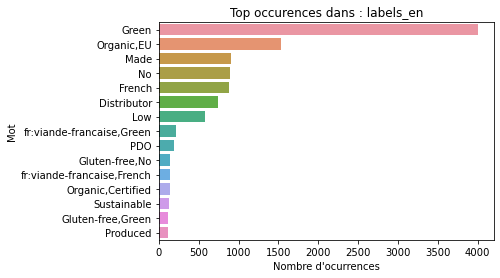

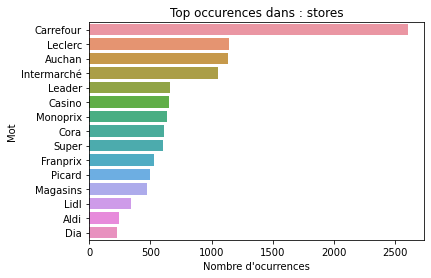

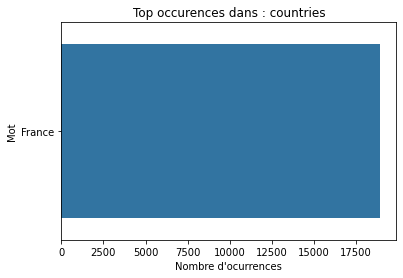

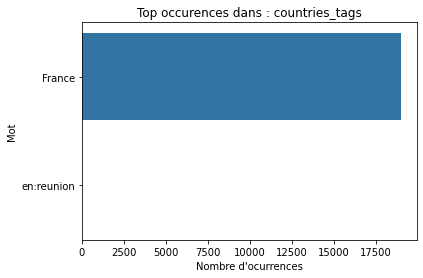

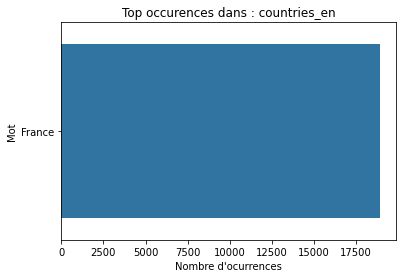

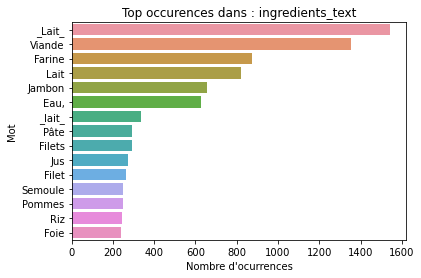

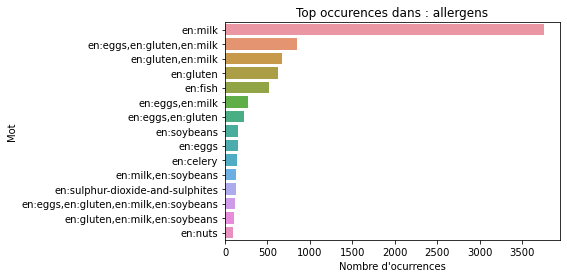

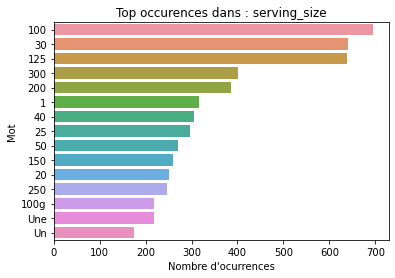

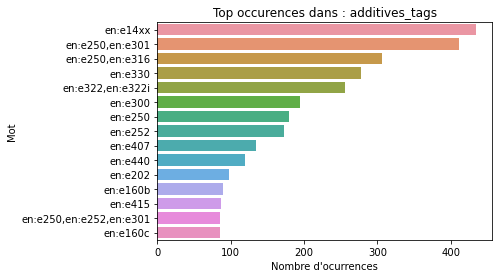

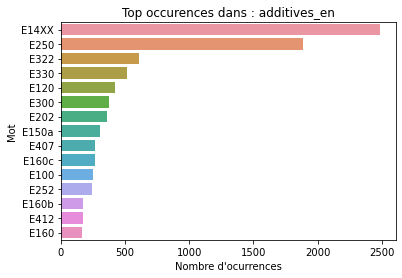

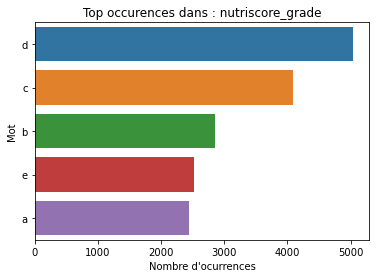

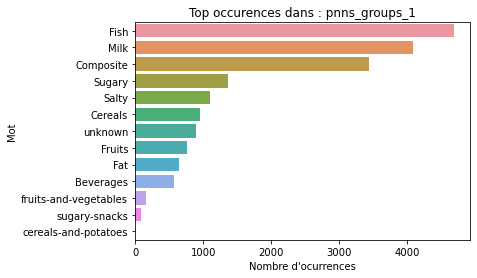

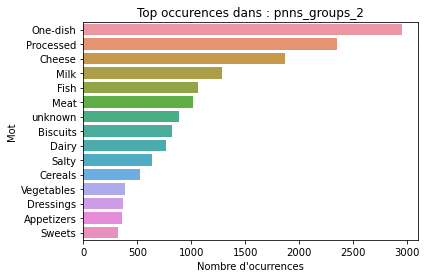

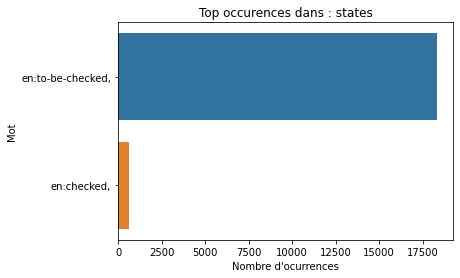

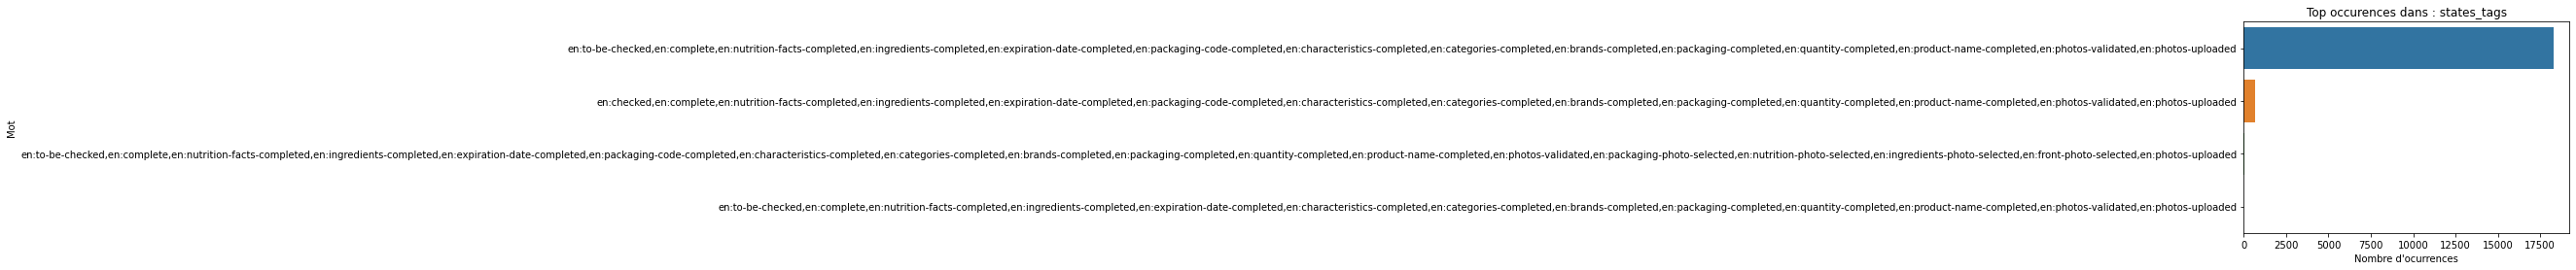

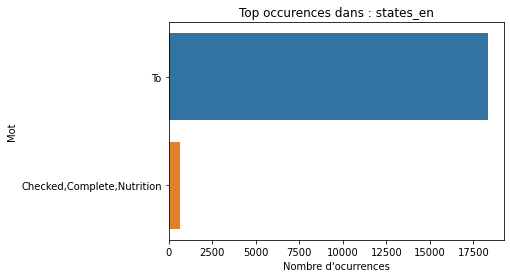

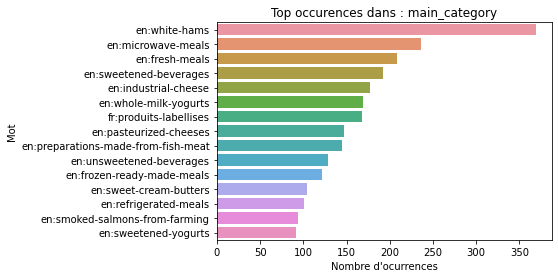

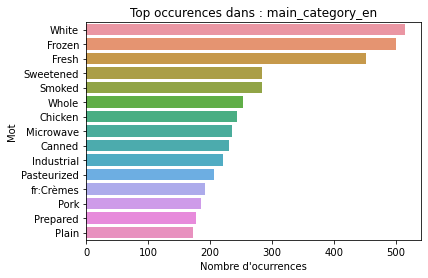

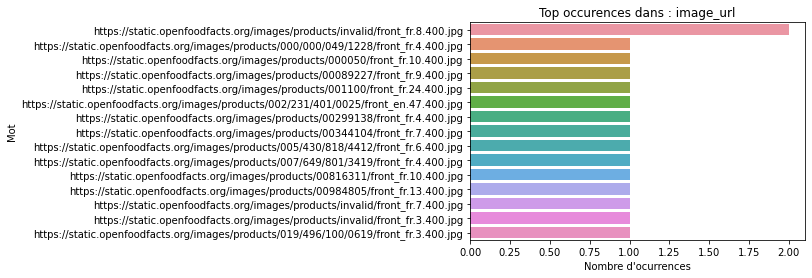

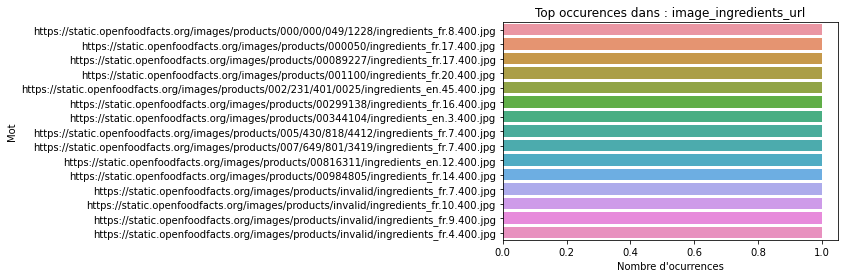

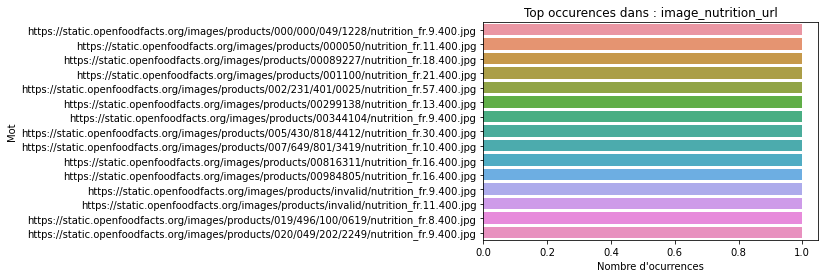

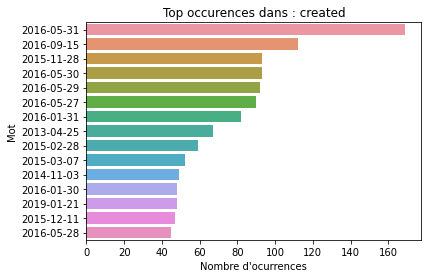

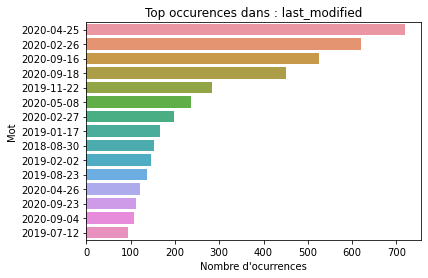

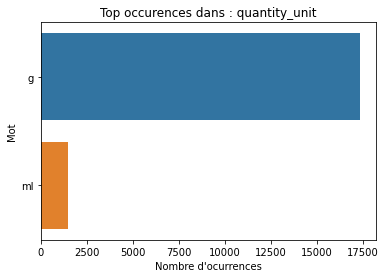

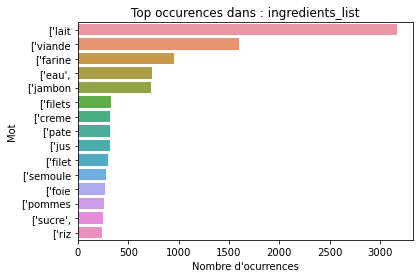

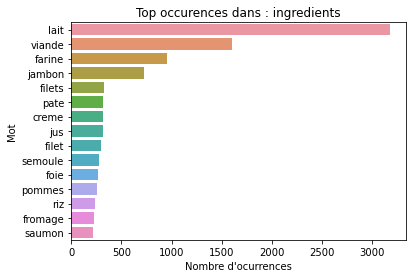

In [15]:
gCols = ['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime', 'product_name', 
         'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 
         'categories_tags', 'categories_en', 'labels', 'labels_tags', 'labels_en', 'stores', 
         'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 
         'serving_size', 'additives_tags', 'additives_en', 'nutriscore_grade', 'pnns_groups_1', 
         'pnns_groups_2','states', 'states_tags', 'states_en', 'main_category', 'main_category_en', 
         'image_url', 'image_ingredients_url', 'image_nutrition_url', 'created', 'last_modified', 
         'quantity_unit', 'ingredients_list', 'ingredients']

populaires = []
for gCol in gCols :
    liste = [str(i).split(' ', 1)[0] for i in data[gCol].dropna().tolist()]
    populaires.append(collections.Counter(liste).most_common(15))

for gCol, liste in zip(gCols[1:], populaires[1:]):
    df_populaires = pd.DataFrame(liste, columns = ["Mot","Nombre d'ocurrences"]).sort_values(by="Nombre d'ocurrences",ascending=False)
    sns.barplot(y = "Mot", x="Nombre d'ocurrences", data = df_populaires)
    plt.title('Top occurences dans : ' + gCol)
    plt.show()

In [16]:
data['categories'].value_counts()

Viandes, Charcuteries, Jambons, Jambons blancs                                                                                                                                                                                                                                                                                                                                                                                                                                                  304
Produits de la mer, Poissons, Saumons, Poissons fumés, Saumons fumés, Saumons fumés d'élevage                                                                                                                                                                                                                                                                                                                                                                                                    86
Viandes, Viande de lapin        

In [17]:
def tagsCounter(df,tagsCol='categories',topQ=15):
    tags = df[~df[tagsCol].isna()][tagsCol].tolist()
    tagsCounter = {}
    for tag in tags:
        for word in tag.split(','):
            if word not in tagsCounter:
                tagsCounter[word] = 1
            else:
                tagsCounter[word] += 1

    for word in sorted(tagsCounter, key=tagsCounter.get, reverse=True)[:topQ]:
        print(f'{word}: {tagsCounter[word]}')

Les catégories les plus utilisés :

In [18]:
tagsCounter(data,'categories_tags',25)

en:dairies: 4163
en:meats: 4019
en:meals: 3847
en:plant-based-foods-and-beverages: 3054
en:fermented-foods: 2979
en:fermented-milk-products: 2967
en:prepared-meats: 2714
en:plant-based-foods: 2659
en:fresh-foods: 2380
en:cheeses: 2003
en:snacks: 1711
en:desserts: 1643
en:meat-based-products: 1503
en:seafood: 1484
en:frozen-foods: 1478
en:meals-with-meat: 1268
en:sweet-snacks: 1259
en:fishes: 1161
en:canned-foods: 1127
en:fruits-and-vegetables-based-foods: 1020
en:cow-cheeses: 988
en:cereals-and-potatoes: 982
en:beverages: 981
en:spreads: 946
en:microwave-meals: 927


Les ingrédients les plus utilisés :

In [19]:
def ingredientsCounter_F(df,ingredientsCol='ingredients',topQ=15):
    ingredients = data[ingredientsCol].fillna('').apply(lambda s: s.split(',') if s != '' else [])
    ingredientsCounter = {}
    for lst in ingredients:
        for ingredient in lst:
            if ingredient:
                if ingredient in ingredientsCounter:
                    ingredientsCounter[ingredient] += 1
                else:
                    ingredientsCounter[ingredient] = 1
    for ingredient in sorted(ingredientsCounter, key=ingredientsCounter.get, reverse=True)[:topQ]:
        print(f'{ingredient}: {ingredientsCounter[ingredient]}')
    
    return ingredientsCounter

In [20]:
ingredientsCounter = ingredientsCounter_F(data,'ingredients',25)

sel: 10373
eau: 5741
sucre: 4678
dextrose: 2056
farine de ble: 1966
aromes: 1423
huile de tournesol: 1394
huile de colza: 1384
poivre: 1339
epices: 1336
ail: 1335
ferments lactiques: 1303
e: 1140
aromes naturels: 1088
beurre: 1062
creme: 971
sirop de glucose: 941
oignons: 936
arome: 929
arome naturel: 880
viande de porc: 780
conservateur  nitrite de sodium: 707
persil: 703
proteines de lait: 695
creme fraiche: 649


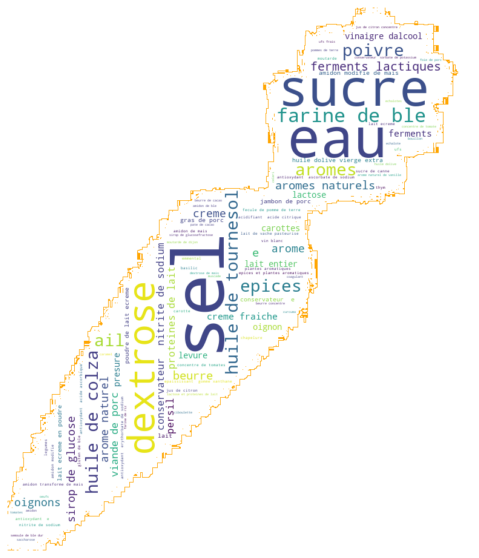

<Figure size 432x288 with 0 Axes>

In [21]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

carrot_mask = np.array(Image.open('carrot.jpg'))
wc = WordCloud(background_color='white', max_words=100, mask=carrot_mask,
              contour_width=1, contour_color='orange')
wc.generate_from_frequencies(ingredientsCounter)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

Wordcloud (nuage de mots) en forme de carotte. Elle prend les 100 plus grandes occurrences.

 ## Analyse bivariée

<AxesSubplot:>

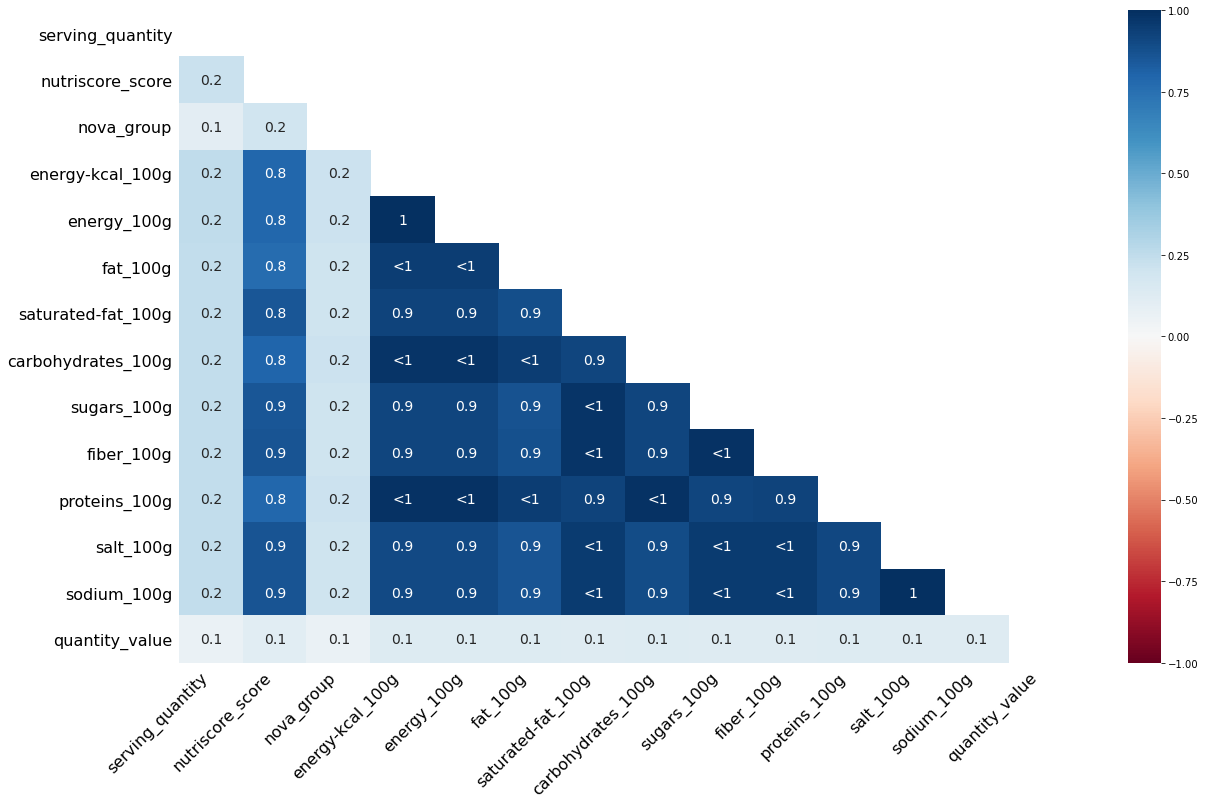

In [22]:
import missingno as msno #https://github.com/ResidentMario/missingno
msno.heatmap(data.select_dtypes(include=['int64','float64']))

> Nullity correlation ranges from **-1** (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to **1** (if one variable appears the other definitely also does). Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.
Entries marked **<1** or **>-1** have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. [...] Indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.
The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.

### Pearson's r

En statistique, le coefficient de corrélation de Pearson est une statistique qui mesure la corrélation linéaire entre deux variables X et Y. Il a une valeur comprise entre +1 et −1. Une valeur de +1 correspond à une corrélation linéaire positive totale, 0 à une absence de corrélation linéaire et -1 est une corrélation linéaire négative totale.

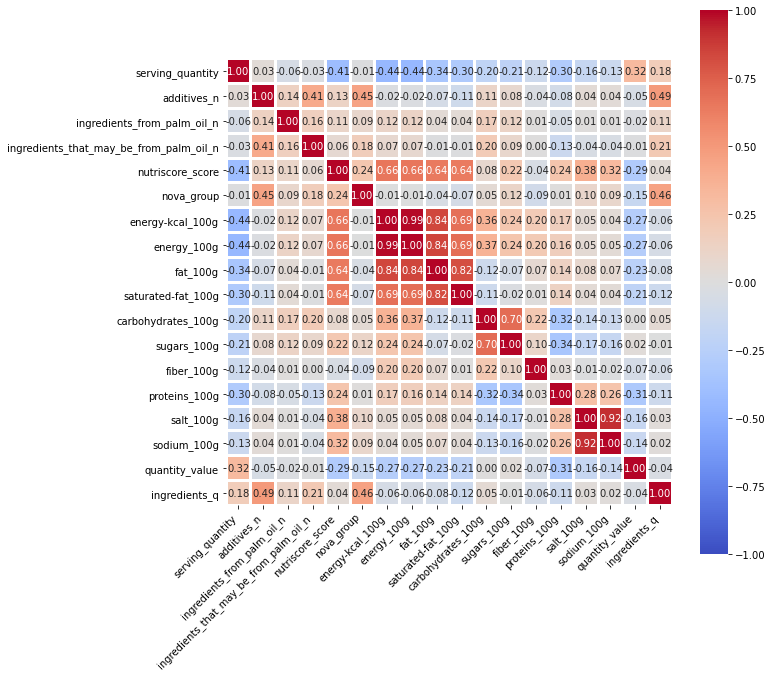

In [23]:
corr = data.corr() #Pearson's r
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr,
    annot=True, fmt='.2f',
    linewidths=2,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [24]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)

df_so = so.to_frame()
df_so.reset_index(inplace=True)
df_so = df_so.rename(columns = {'level_0':'serie1','level_1':'serie2',0: 'abs_corr'})
df_so['abs_corr'] = df_so['abs_corr'].round(2)
df_so[(df_so['abs_corr'] < 1)].drop_duplicates(subset='abs_corr')

serie1  \
18                          energy-kcal_100g   
20                                 salt_100g   
22                                  fat_100g   
26                        saturated-fat_100g   
28                        carbohydrates_100g   
30                               energy_100g   
34                               energy_100g   
38                                  fat_100g   
42                             ingredients_q   
44                             ingredients_q   
46                               additives_n   
48                          serving_quantity   
52                          serving_quantity   
56                          nutriscore_score   
58                        carbohydrates_100g   
60                        carbohydrates_100g   
62                          serving_quantity   
66                        carbohydrates_100g   
72                             proteins_100g   
74                        saturated-fat_100g   
78                          nutriscore_score   
80                                 salt_100g   
82                               energy_100g   
86                               sodium_100g   
88                          nutriscore_score   
96                                  fat_100g   
98                                fiber_100g   
102                              sugars_100g   
108                              energy_100g   
116                            ingredients_q   
120                                salt_100g   
126                              energy_100g   
136                               nova_group   
138                           quantity_value   
148  ingredients_that_may_be_from_palm_oil_n   
156                            ingredients_q   
170              ingredients_from_palm_oil_n   
182                               fiber_100g   
186                              sugars_100g   
194                            proteins_100g   
204                              energy_100g   
220                               fiber_100g   
230                            ingredients_q   
244                              sodium_100g   
272                         serving_quantity   
280                           quantity_value   
294                         serving_quantity   
320  ingredients_that_may_be_from_palm_oil_n   

                                      serie2  abs_corr  
18                               energy_100g      0.99  
20                               sodium_100g      0.92  
22                               energy_100g      0.84  
26                                  fat_100g      0.82  
28                               sugars_100g      0.70  
30                        saturated-fat_100g      0.69  
34                          nutriscore_score      0.66  
38                          nutriscore_score      0.64  
42                               additives_n      0.49  
44                                nova_group      0.46  
46                                nova_group      0.45  
48                               energy_100g      0.44  
52                          nutriscore_score      0.41  
56                                 salt_100g      0.38  
58                               energy_100g      0.37  
60                          energy-kcal_100g      0.36  
62                                  fat_100g      0.34  
66                             proteins_100g      0.32  
72                            quantity_value      0.31  
74                          serving_quantity      0.30  
78                            quantity_value      0.29  
80                             proteins_100g      0.28  
82                            quantity_value      0.27  
86                             proteins_100g      0.26  
88                             proteins_100g      0.24  
96                            quantity_value      0.23  
98                        carbohydrates_100g      0.22  
102                         serving_quantity      0.21  
108                             

Le coefficient R de Pearson peut être interprété (en valeurs absolues) comme suit :

| Rang | Correlation |
| --- | --- |
| 1~0.9 | corrélation très élevée |
| 0.9~0.7 | corrélation élevée |
| 0.7~0.5 | corrélation modérée |
| 0.5~0.3 | faible corrélation |
| 0.3~0 | corrélation négligeable |

In [25]:
def corrType(df):
    temp = df.copy()
    temp['type'] = np.where(((temp['abs_corr'] > 0.9) & (temp['abs_corr'] <= 1)), 'very_high',
                           np.where(((temp['abs_corr'] > 0.7) & (temp['abs_corr'] < 0.9)), 'high',
                                    np.where(((temp['abs_corr'] > 0.5) & (temp['abs_corr'] < 0.7)), 'moderate',
                                             np.where(((temp['abs_corr'] > 0.3) & (temp['abs_corr'] < 0.5)), 'low',
                                                      np.where(((temp['abs_corr'] > 0) & (temp['abs_corr'] < 0.3)), 'insignificant','error'
                           )))))
    return temp

In [26]:
df_so = corrType(df_so)
df_so[(df_so['abs_corr'] < 1)].drop_duplicates(subset='abs_corr')

serie1  \
18                          energy-kcal_100g   
20                                 salt_100g   
22                                  fat_100g   
26                        saturated-fat_100g   
28                        carbohydrates_100g   
30                               energy_100g   
34                               energy_100g   
38                                  fat_100g   
42                             ingredients_q   
44                             ingredients_q   
46                               additives_n   
48                          serving_quantity   
52                          serving_quantity   
56                          nutriscore_score   
58                        carbohydrates_100g   
60                        carbohydrates_100g   
62                          serving_quantity   
66                        carbohydrates_100g   
72                             proteins_100g   
74                        saturated-fat_100g   
78                          nutriscore_score   
80                                 salt_100g   
82                               energy_100g   
86                               sodium_100g   
88                          nutriscore_score   
96                                  fat_100g   
98                                fiber_100g   
102                              sugars_100g   
108                              energy_100g   
116                            ingredients_q   
120                                salt_100g   
126                              energy_100g   
136                               nova_group   
138                           quantity_value   
148  ingredients_that_may_be_from_palm_oil_n   
156                            ingredients_q   
170              ingredients_from_palm_oil_n   
182                               fiber_100g   
186                              sugars_100g   
194                            proteins_100g   
204                              energy_100g   
220                               fiber_100g   
230                            ingredients_q   
244                              sodium_100g   
272                         serving_quantity   
280                           quantity_value   
294                         serving_quantity   
320  ingredients_that_may_be_from_palm_oil_n   

                                      serie2  abs_corr           type  
18                               energy_100g      0.99      very_high  
20                               sodium_100g      0.92      very_high  
22                               energy_100g      0.84           high  
26                                  fat_100g      0.82           high  
28                               sugars_100g      0.70          error  
30                        saturated-fat_100g      0.69       moderate  
34                          nutriscore_score      0.66       moderate  
38                          nutriscore_score      0.64       moderate  
42                               additives_n      0.49            low  
44                                nova_group      0.46            low  
46                                nova_group      0.45            low  
48                               energy_100g      0.44            low  
52                          nutriscore_score      0.41            low  
56                                 salt_100g      0.38            low  
58                               energy_100g      0.37            low  
60                          energy-kcal_100g      0.36            low  
62                                  fat_100g      0.34            low  
66                             proteins_100g      0.32            low  
72                            quantity_value      0.31            low  
74                          serving_quantity      0.30          error  
78                            quantity_value      0.29  insignificant  
80                             proteins_100g      0.28  insignificant  
82                           

In [27]:
df_so[(df_so['serie1'] == 'nutriscore_score') & (df_so['serie2'] != 'nutriscore_score')]

serie1                                   serie2  abs_corr  \
35   nutriscore_score                              energy_100g      0.66   
36   nutriscore_score                         energy-kcal_100g      0.66   
39   nutriscore_score                                 fat_100g      0.64   
40   nutriscore_score                       saturated-fat_100g      0.64   
53   nutriscore_score                         serving_quantity      0.41   
56   nutriscore_score                                salt_100g      0.38   
69   nutriscore_score                              sodium_100g      0.32   
78   nutriscore_score                           quantity_value      0.29   
88   nutriscore_score                            proteins_100g      0.24   
94   nutriscore_score                               nova_group      0.24   
101  nutriscore_score                              sugars_100g      0.22   
152  nutriscore_score                              additives_n      0.13   
178  nutriscore_score              ingredients_from_palm_oil_n      0.11   
196  nutriscore_score                       carbohydrates_100g      0.08   
222  nutriscore_score  ingredients_that_may_be_from_palm_oil_n      0.06   
254  nutriscore_score                            ingredients_q      0.04   
258  nutriscore_score                               fiber_100g      0.04   

              type  
35        moderate  
36        moderate  
39        moderate  
40        moderate  
53             low  
56             low  
69             low  
78   insignificant  
88   insignificant  
94   insignificant  
101  insignificant  
152  insignificant  
178  insignificant  
196  insignificant  
222  insignificant  
254  insignificant  
258  insignificant

### Chi-squared

Le test du chi-squared vérifie s'il existe une relation significative entre deux variables catégorielles. Le test compare les observations observées aux observations attendues. Les données sont généralement affichées dans un format de tabulation croisée, chaque ligne représentant une catégorie pour une variable et chaque colonne représentant une catégorie pour une autre variable. Le test d'indépendance du chi-squared est un test omnibus. Cela signifie qu'il teste les données dans leur ensemble, pourtant on ne pourra pas dire quels niveaux (catégories) des variables sont responsables de la relation si le tableau du chi-squared est plus grand que 2×2. Si le test est supérieur à 2×2, il nécessite un test post hoc.

- H0 (hypothèse nulle) : Il n'y a pas de relation entre la variable 1 un et la variable 2.
- H1 (hypothèse alternative) : il existe une relation entre la variable 1 et la variable 2.

Si le p-value est significative, on peut rejeter l'hypothèse nulle et affirmer que les résultats soutiennent l'hypothèse alternative.

**Hypothèses du chi-squared**

Les hypothèses suivantes doivent être satisfaites pour que les résultats du test du chi-squared soient fiables :

- Lors du test des données, les cellules doivent être des fréquences ou des nombres de cas et non des pourcentages. On peut convertir en pourcentages après avoir testé les données
- Les niveaux (catégories) des variables testées s'excluent mutuellement
- Chaque participant contribue à une seule cellule du tableau du chi-squared
- Les groupes testés doivent être indépendants
- La valeur des cellules attendues doit être supérieure à 5

Si toutes ces hypothèses sont satisfaites, alors le chi-squared est le bon test à utiliser.

In [28]:
from scipy import stats
from scipy.stats import chi2 #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
from scipy.stats import chi2_contingency #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [29]:
def chi2_table(series1, series2, alpha=0.05):
    
    if type(series1) != list:
        crosstab = pd.crosstab(series1, series2)
        chi2q, p, dof, expected = stats.chi2_contingency(crosstab)

    elif type(series1) == list and type(series2) == list:
        for entry2 in series2:
            for entry1 in series1:
                crosstab = pd.crosstab(entry1, entry2)
                chi2q, p, dof, expected = stats.chi2_contingency(crosstab)

    elif type(series1) == list:
        for entry in series1:
            crosstab = pd.crosstab(entry, series2)
            chi2q, p, dof, expected = stats.chi2_contingency(crosstab)
    
    prob = 1.0-alpha
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f,\ncritical=%.3f,\nchi2=%.3f\n' % (prob, critical, chi2q))
    if abs(chi2q) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    print('\nsignificance=%.3f,\np=%.3f\n' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
   
    if p <= alpha:
        return False
    else:
        return True

In [30]:
x = data['nutriscore_score']
for col in data.select_dtypes(include = ['int64','float64']).columns:
    print("Chi-squared : {} / {}".format('nutriscore_score',col))
    if data[col].nunique() > 20 :
        y = data[col].astype('category')
    else:
        y = data[col].astype('category')
    chi2_table(x, y)
    print('_'*90,'\n')

Chi-squared : nutriscore_score / serving_quantity
probability=0.950,
critical=16763.609,
chi2=26577.416

Dependent (reject H0)

significance=0.050,
p=0.000

Dependent (reject H0)
__________________________________________________________________________________________ 

Chi-squared : nutriscore_score / additives_n
probability=0.950,
critical=884.607,
chi2=2487.408

Dependent (reject H0)

significance=0.050,
p=0.000

Dependent (reject H0)
__________________________________________________________________________________________ 

Chi-squared : nutriscore_score / ingredients_from_palm_oil_n
probability=0.950,
critical=108.648,
chi2=341.251

Dependent (reject H0)

significance=0.050,
p=0.000

Dependent (reject H0)
__________________________________________________________________________________________ 

Chi-squared : nutriscore_score / ingredients_that_may_be_from_palm_oil_n
probability=0.950,
critical=250.207,
chi2=438.159

Dependent (reject H0)

significance=0.050,
p=0.000

Dependent

Le test chi-squared conclut au rejet de l'Hypothèse 0 pour toutes les variables analyses. Donc, on peut dire qu'il y a un lien entre le *nutriscore_score* et le valeur des variables analyses.

### ANOVA

L'analyse de la variance est un ensemble de modèles statistiques utilisées pour vérifier si les moyennes des groupes proviennent d'une même population. Le test repose sur le test de Fisher et donc sur la normalité des distributions et l'independence des échantillons.

- Normalité de la distribution : sous l'Hypothèse 0, les échantillons sont issues d'une même population et suivent une loi normale. Il est donc nécessaire de vérifier la normalité des distributions et l'homoscédasticité.
- Indépendence des échantillons : chaque échantillon analysé est indépendant des autres échantillons; ce qui permet de supposer que les échantillons sont indépendants.

Donc, les hypothèses à tester sont :

- H0 : m1 = m2 = ... = mk = m
- H1 : Il existe un (i,j) telle que mi =! mj

**Comme nous le soulignerons précédemment, les variables semblent ne pas suivre une distribution normale.**

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from bioinfokit.analys import stat

<AxesSubplot:>

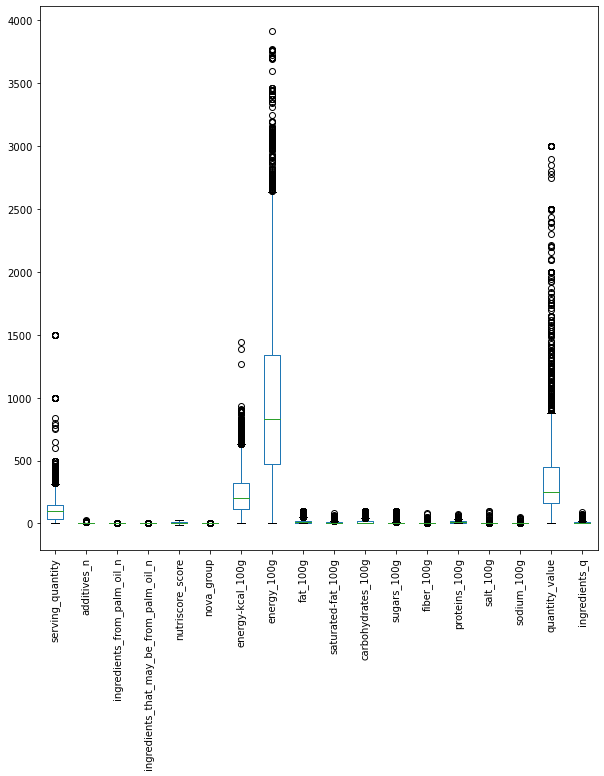

In [32]:
data.boxplot(column=['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
                     'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nova_group', 'energy-kcal_100g',
                     'energy_100g', 'fat_100g', 'saturated-fat_100g','carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
                     'proteins_100g', 'salt_100g', 'sodium_100g', 'quantity_value', 'ingredients_q'],
             grid=False, rot=90, figsize=(10,10))

<AxesSubplot:>

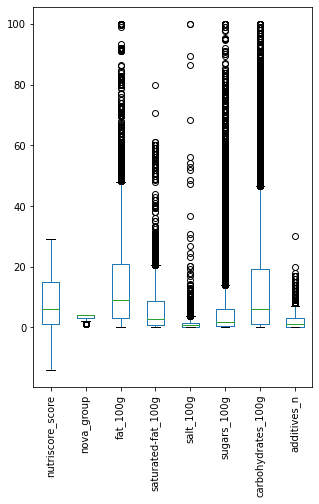

In [33]:
data.boxplot(column=['nutriscore_score','nova_group','fat_100g','saturated-fat_100g','salt_100g','sugars_100g',
                     'carbohydrates_100g','additives_n'], 
             grid=False, figsize=(5,7),rot=90)

In [34]:
data.groupby('nutriscore_grade').mean()

serving_quantity  additives_n  ingredients_from_palm_oil_n  \
nutriscore_grade                                                               
a                       168.678506     1.097131                     0.006557   
b                       186.026286     1.803722                     0.009831   
c                       117.756955     2.301984                     0.013715   
d                        69.449085     2.161514                     0.031114   
e                        56.792529     2.290425                     0.050060   

                  ingredients_that_may_be_from_palm_oil_n  nutriscore_score  \
nutriscore_grade                                                              
a                                                0.060246         -3.320082   
b                                                0.101475          1.016854   
c                                                0.118295          5.006368   
d                                                0.169045         14.085811   
e                                                0.095352         21.287644   

                  nova_group  energy-kcal_100g  energy_100g   fat_100g  \
nutriscore_grade                                                         
a                   2.739877        137.412061   574.631280   3.992762   
b                   3.474910        134.521011   562.075591   5.366870   
c                   3.647845        180.566678   752.693265   9.074766   
d                   3.585844        287.228669  1198.776933  19.277250   
e                   3.607286        409.611114  1709.355741  31.684331   

                  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
nutriscore_grade                                                        
a                           0.810379           15.625193     3.260798   
b                           1.556735           12.972697     4.386297   
c                           2.983840           14.614405     6.645218   
d                           9.574611           13.831458     6.553022   
e                          15.889539           19.427825    12.181300   

                  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
nutriscore_grade                                                      
a                   3.036002       8.377177   0.366225     0.146448   
b                   2.037662       8.220879   0.675696     0.270293   
c                   2.247819       9.382877   0.979607     0.391848   
d                   2.283516      14.286047   1.627409     0.660719   
e                   2.439498      11.483004   1.793006     0.717123   

                  quantity_value  ingredients_q  
nutriscore_grade                                 
a                     495.271097       6.120492  
b                     480.856051       8.746138  
c                     380.494231       8.688219  
d                     274.991037       7.654578  
e                     271.645657       8.012316

<AxesSubplot:>

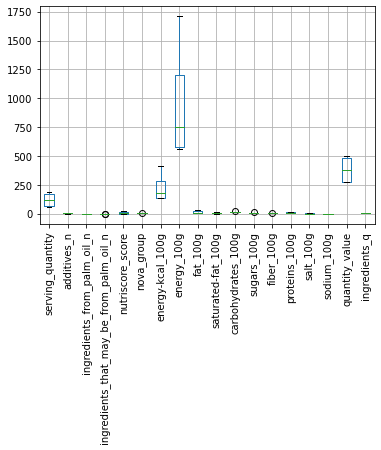

In [35]:
data.groupby('nutriscore_grade').mean().boxplot(rot=90)

In [36]:
data.groupby('nova_group').mean()

serving_quantity  additives_n  ingredients_from_palm_oil_n  \
nova_group                                                               
1.0               146.831191     0.057382                     0.000000   
2.0                24.653846     0.045936                     0.000000   
3.0               101.277256     0.336981                     0.003510   
4.0               123.596129     3.015664                     0.035767   

            ingredients_that_may_be_from_palm_oil_n  nutriscore_score  \
nova_group                                                              
1.0                                        0.003586         -1.265214   
2.0                                        0.000000         19.200000   
3.0                                        0.010531          9.466713   
4.0                                        0.187277          8.899869   

            energy-kcal_100g  energy_100g   fat_100g  saturated-fat_100g  \
nova_group                                                                 
1.0               159.883129   669.031338   4.986195            1.421761   
2.0               691.056909  2886.637066  73.905577           41.890196   
3.0               248.838192  1036.254229  17.552913            8.572819   
4.0               222.314414   928.778278  12.221707            5.044347   

            carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  \
nova_group                                                               
1.0                  19.260858     5.078182    3.154648       8.353838   
2.0                   8.153384     7.874196    1.668457       0.554013   
3.0                   8.858657     3.641114    2.399868      13.691370   
4.0                  17.613963     8.557195    2.278038       9.949921   

            salt_100g  sodium_100g  quantity_value  ingredients_q  
nova_group                                                         
1.0          0.123248     0.049210      587.963104       1.506276  
2.0          1.979510     0.791100      369.050179       1.848057  
3.0          1.408447     0.563379      315.067738       4.937023  
4.0          1.227567     0.495548      354.599177      10.233574

<AxesSubplot:>

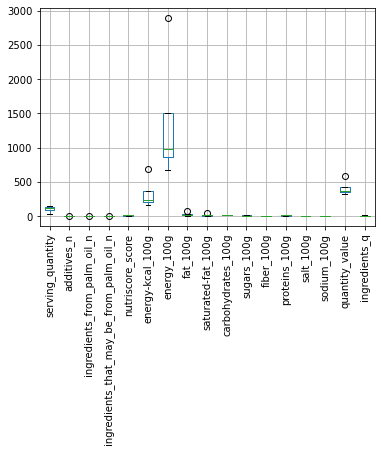

In [37]:
data.groupby('nova_group').mean().boxplot(rot=90)

Ce phénomène est dû à la variation Inter-Groupe (Between-Group) : une quantification de la variation expliquée par notre variable *nutriscore_grade*. Cependant, il y a aussi une partie de la variation qui ne peut pas expliquer la variable *nutriscore_grade*, nous aurions besoin de plus de variables pour l'expliquer. Puisque nous n'avons pas ces nouvelles variables, la variation reste inexpliquée et est appelée la variation Intra-groupe (Within-Group).

#### ANOVA: test d'hypothèse des différences de groupe

Lorsque la variation totale est divisée en deux, un test d'hypothèse est appliqué pour savoir si les différences observées dans notre échantillon sont significatives : Y a-t-il systématiquement une différence entre les scores, ou ce bruit aléatoire est-il dû à l'effet d'échantillonnage ? Nous avons besoin d'un test statistique pour nous donner cette réponse: le test ANOVA F.

In [38]:
num_data = data[numCols].copy()
num_data = num_data.dropna()
num_data = num_data.reset_index(drop=True)
num_data = num_data.rename(columns={"energy-kcal_100g":"energy_kcal_100g", "saturated-fat_100g":"saturated_fat_100g"})

In [39]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    #PR(F): p-value; eta-sq: R^2 of ANOVA; omega_sq: is a measure of effect size, or the degree of association for a population
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols].round(decimals=3)
    return aov

In [40]:
keys = []
tables = []
for var in num_data.columns:
    # Ordinary Least Squares (OLS) model
    model = ols('{} ~ C({})'.format('nutriscore_score',var), data=num_data).fit() #outcome_variable ~ C(independent_variable)
    aov_table = sm.stats.anova_lm(model, typ=2)
    keys.append(var)
    tables.append(aov_table)
    print(anova_table(aov_table))
    #print(aov_table)
    print('_'*90,'\n')
    
aov_data = pd.concat(tables, keys=keys, axis=0)

                         sum_sq      df  mean_sq       F  PR(>F)  eta_sq  \
C(serving_quantity)  240923.574   388.0  620.937  15.029     0.0   0.391   
Residual             375843.797  9097.0   41.315     NaN     NaN     NaN   

                     omega_sq  
C(serving_quantity)     0.365  
Residual                  NaN  
__________________________________________________________________________________________ 

                    sum_sq      df   mean_sq       F  PR(>F)  eta_sq  omega_sq
C(additives_n)   28046.918    18.0  1558.162  25.056     0.0   0.045     0.044
Residual        588720.453  9467.0    62.187     NaN     NaN     NaN       NaN
__________________________________________________________________________________________ 

                                    sum_sq      df   mean_sq        F  PR(>F)  \
C(ingredients_from_palm_oil_n)   15619.382     2.0  7809.691  123.196     0.0   
Residual                        601147.989  9483.0    63.392      NaN     NaN   

        

In [41]:
keys = []
tables = []
for var in num_data.columns:
    # Ordinary Least Squares (OLS) model
    model = ols('{} ~ C({})'.format('nova_group',var), data=num_data).fit() #outcome_variable ~ C(independent_variable)
    aov_table = sm.stats.anova_lm(model, typ=2)
    keys.append(var)
    tables.append(aov_table)
    print(anova_table(aov_table))
    #print(aov_table)
    print('_'*90,'\n')
    
aov_data = pd.concat(tables, keys=keys, axis=0)

                       sum_sq      df  mean_sq      F  PR(>F)  eta_sq  \
C(serving_quantity)  1253.626   388.0    3.231  5.007     0.0   0.176   
Residual             5870.004  9097.0    0.645    NaN     NaN     NaN   

                     omega_sq  
C(serving_quantity)     0.141  
Residual                  NaN  
__________________________________________________________________________________________ 

                  sum_sq      df  mean_sq        F  PR(>F)  eta_sq  omega_sq
C(additives_n)  2788.137    18.0  154.897  338.233     0.0   0.391      0.39
Residual        4335.492  9467.0    0.458      NaN     NaN     NaN       NaN
__________________________________________________________________________________________ 

                                 sum_sq      df  mean_sq       F  PR(>F)  \
C(ingredients_from_palm_oil_n)    48.39     2.0   24.195  32.429     0.0   
Residual                        7075.24  9483.0    0.746     NaN     NaN   

                                eta_sq

Il existe une différence statistiquement significative entre les groupes et leurs effets sur le nutriscore_score (colonnes : F, PR(<F) et omega_sq)

Afin de savoir quels groupes différaient de manière significative, des tests post-hoc doivent être effectués. Avant d'effectuer ce travail, les hypothèses doivent être vérifiées en premier au cas où des modifications doivent être apportées au modèle.

#### QQ Plot

Diagramme Quantile-Quantile est un outil graphique permettant d'evaluer la pertinence de l'ajustement d'une distribution donnée à un modèle théorique (Gaussian distribution).

Une correspondance parfaire pour la destribution sera indiquée par une ligne sur un angle de 45° à partir du bas à gauche vers le haut à droite. Les écarts des points par rapport à la ligne indiquent un écart par rapport à la distribution attendue.

Le test de normalité est le test de Shapiro-Wilk, il produit un coefficient W entre 0 et 1 avec 1 correspondant à une normalité parfaite (pas d'écart par rapport à la distribution théorique) et des valeurs inférieures représentant des écarts par rapport à la normalité.

Donc, les hypothèses à tester sont :
- H0: Data is drawn from a normal distribution
- H1: Data is not drawn from a normal distribution

QQ Plot and Shapiro-Wilk test: serving_quantity
shapiro_test.statistic : 0.989
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


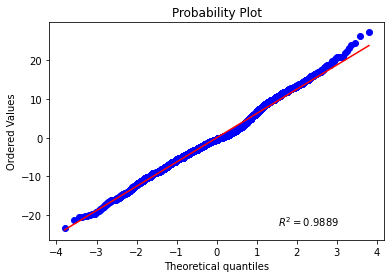

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: additives_n
shapiro_test.statistic : 0.956
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


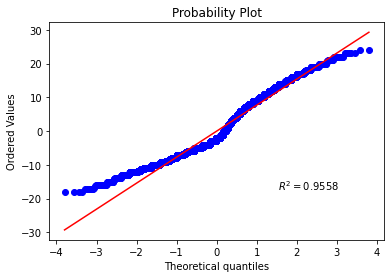

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: ingredients_from_palm_oil_n
shapiro_test.statistic : 0.960
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


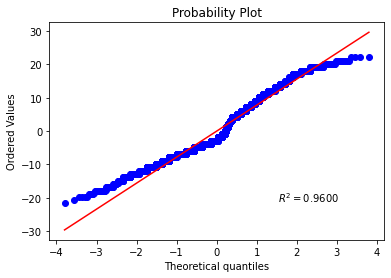

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: ingredients_that_may_be_from_palm_oil_n
shapiro_test.statistic : 0.958
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


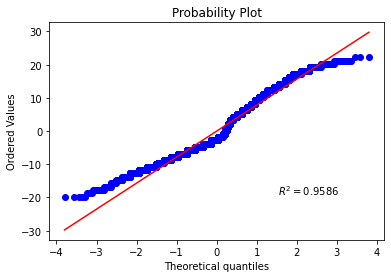

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: nutriscore_score
shapiro_test.statistic : 0.932
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


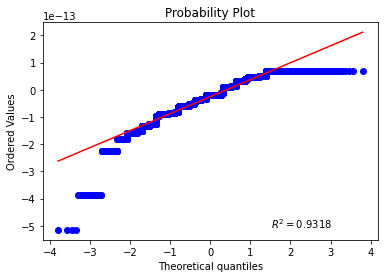

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: nova_group
shapiro_test.statistic : 0.960
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


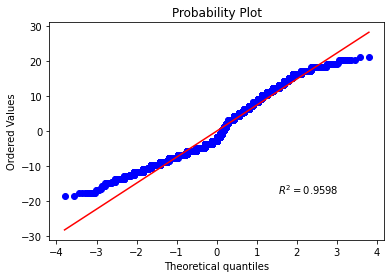

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: energy_kcal_100g
shapiro_test.statistic : 0.971
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


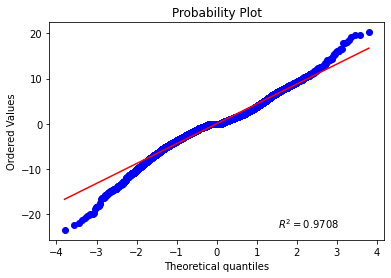

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: energy_100g
shapiro_test.statistic : 0.975
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


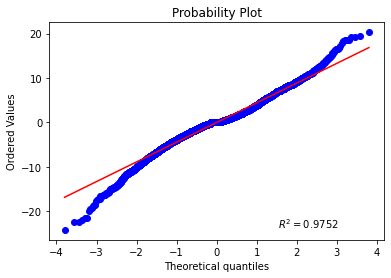

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: fat_100g
shapiro_test.statistic : 0.992
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


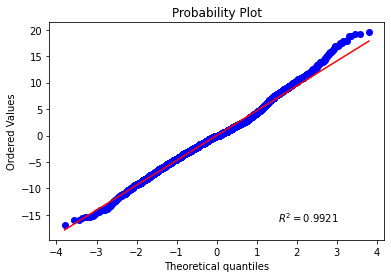

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: saturated_fat_100g
shapiro_test.statistic : 0.983
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


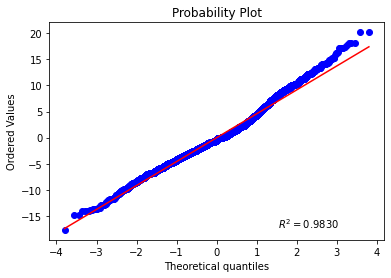

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: carbohydrates_100g
shapiro_test.statistic : 0.995
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


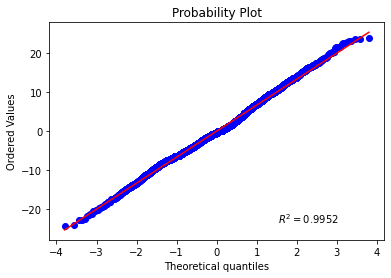

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: sugars_100g
shapiro_test.statistic : 0.982
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


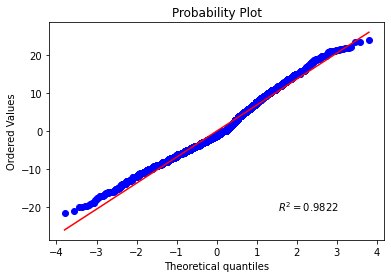

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: fiber_100g
shapiro_test.statistic : 0.954
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


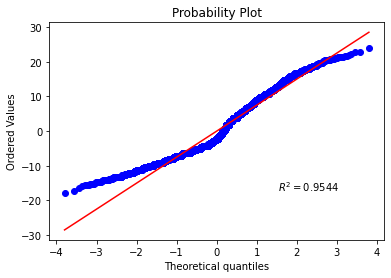

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: proteins_100g
shapiro_test.statistic : 0.983
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


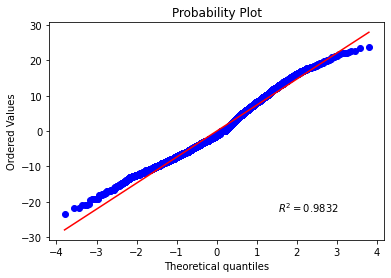

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: salt_100g
shapiro_test.statistic : 0.969
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


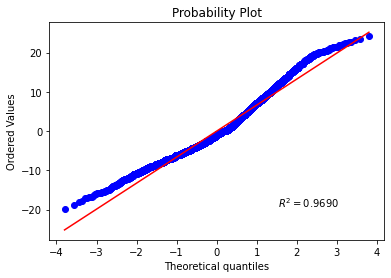

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: sodium_100g
shapiro_test.statistic : 0.969
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


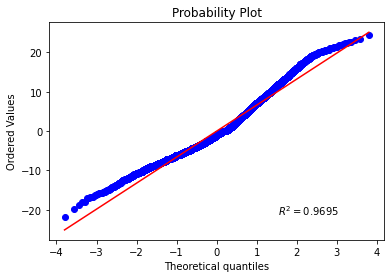

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: quantity_value
shapiro_test.statistic : 0.988
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


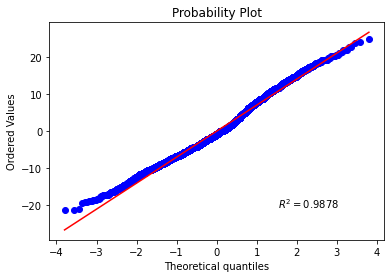

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: ingredients_q
shapiro_test.statistic : 0.958
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


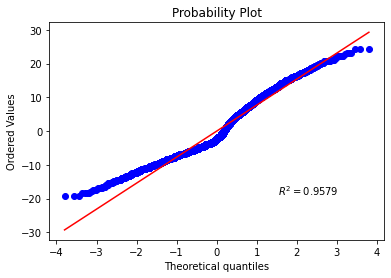

__________________________________________________________________________________________ 



In [42]:
for var in num_data.columns:
    print("QQ Plot and Shapiro-Wilk test: {}".format(var))
    model = ols('{} ~ C({})'.format('nutriscore_score',var), data=num_data).fit()
    shapiro = stats.shapiro(model.resid)
    print('shapiro_test.statistic : %.3f' %shapiro.statistic)
    print('shapiro_test.pvalue : %.3f' %shapiro.pvalue)
    if shapiro.pvalue < 0.05:
        print('H0 hypothesis rejected. Data is not drawn from a normal distribution.')
    else:
        print('H0 hypothesis is not rejected. Data is drawn from a normal distribution.')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
    ax.set
    plt.show()
    print('_'*90,'\n')

QQ Plot and Shapiro-Wilk test: serving_quantity
shapiro_test.statistic : 0.843
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


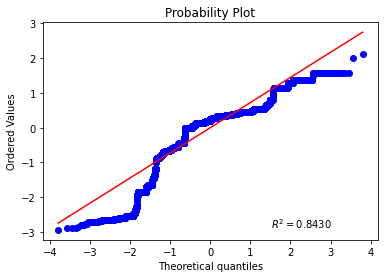

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: additives_n
shapiro_test.statistic : 0.727
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


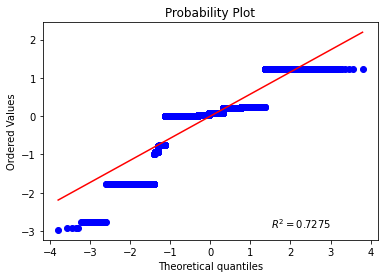

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: ingredients_from_palm_oil_n
shapiro_test.statistic : 0.583
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


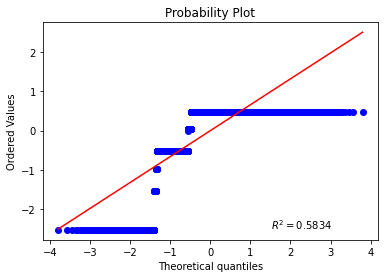

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: ingredients_that_may_be_from_palm_oil_n
shapiro_test.statistic : 0.635
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


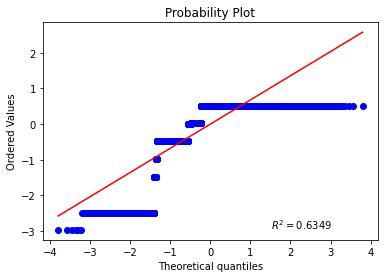

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: nutriscore_score
shapiro_test.statistic : 0.789
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


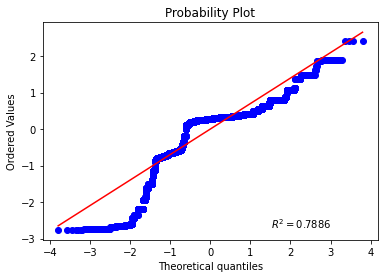

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: nova_group
shapiro_test.statistic : 0.573
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


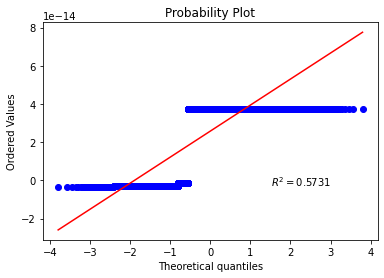

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: energy_kcal_100g
shapiro_test.statistic : 0.853
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


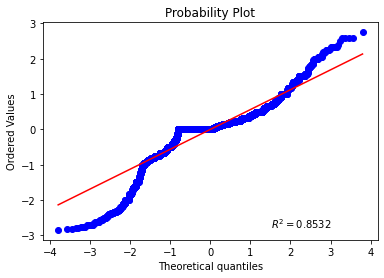

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: energy_100g
shapiro_test.statistic : 0.858
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


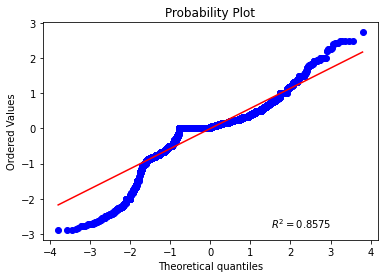

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: fat_100g
shapiro_test.statistic : 0.859
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


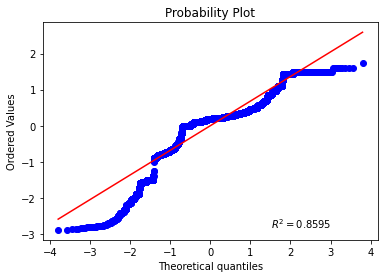

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: saturated_fat_100g
shapiro_test.statistic : 0.834
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


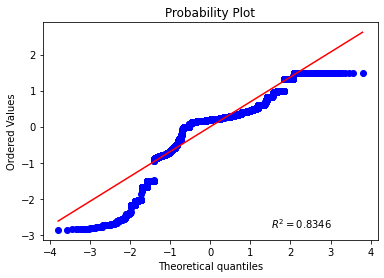

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: carbohydrates_100g
shapiro_test.statistic : 0.827
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


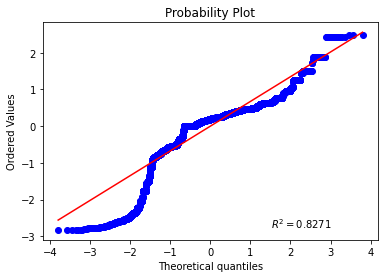

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: sugars_100g
shapiro_test.statistic : 0.806
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


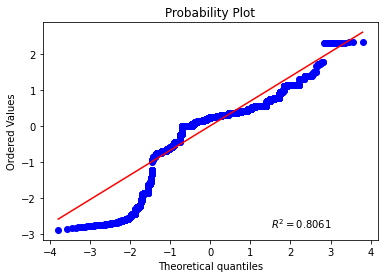

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: fiber_100g
shapiro_test.statistic : 0.714
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


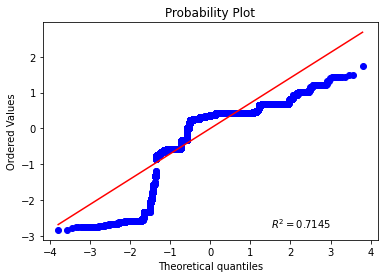

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: proteins_100g
shapiro_test.statistic : 0.845
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


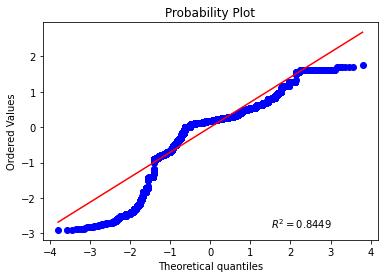

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: salt_100g
shapiro_test.statistic : 0.876
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


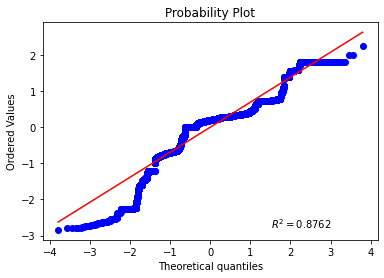

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: sodium_100g
shapiro_test.statistic : 0.876
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


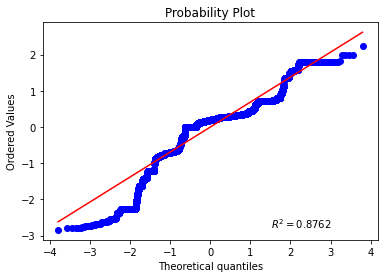

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: quantity_value
shapiro_test.statistic : 0.844
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


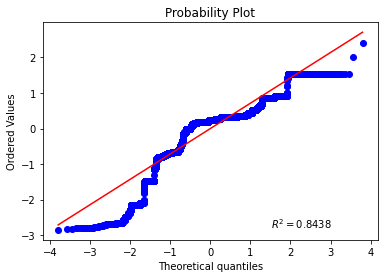

__________________________________________________________________________________________ 

QQ Plot and Shapiro-Wilk test: ingredients_q
shapiro_test.statistic : 0.868
shapiro_test.pvalue : 0.000
H0 hypothesis rejected. Data is not drawn from a normal distribution.


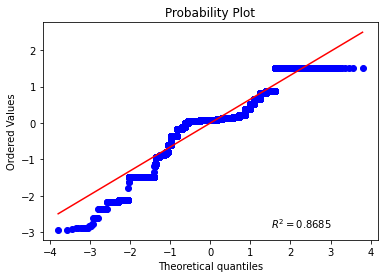

__________________________________________________________________________________________ 



In [43]:
for var in num_data.columns:
    print("QQ Plot and Shapiro-Wilk test: {}".format(var))
    model = ols('{} ~ C({})'.format('nova_group',var), data=num_data).fit()
    shapiro = stats.shapiro(model.resid)
    print('shapiro_test.statistic : %.3f' %shapiro.statistic)
    print('shapiro_test.pvalue : %.3f' %shapiro.pvalue)
    if shapiro.pvalue < 0.05:
        print('H0 hypothesis rejected. Data is not drawn from a normal distribution.')
    else:
        print('H0 hypothesis is not rejected. Data is drawn from a normal distribution.')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
    ax.set
    plt.show()
    print('_'*90,'\n')

#### Shapiro-Wilk

Il teste l'hypothèse nulle selon laquelle un échantillon est issu d'une population théorique (Gaussian distribution)

Donc, les hypothèses à tester sont :
- H0: Sample looks Gaussian
- H1: Sample does not look Gaussian (reject H0)

In [44]:
from scipy.stats import shapiro
for col in num_data.columns:
    stat, p = shapiro(num_data[col])
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print('_'*90,'\n')

serving_quantity
Statistics=0.781, p=0.000
Sample does not look Gaussian (reject H0)
__________________________________________________________________________________________ 

additives_n
Statistics=0.814, p=0.000
Sample does not look Gaussian (reject H0)
__________________________________________________________________________________________ 

ingredients_from_palm_oil_n
Statistics=0.150, p=0.000
Sample does not look Gaussian (reject H0)
__________________________________________________________________________________________ 

ingredients_that_may_be_from_palm_oil_n
Statistics=0.382, p=0.000
Sample does not look Gaussian (reject H0)
__________________________________________________________________________________________ 

nutriscore_score
Statistics=0.956, p=0.000
Sample does not look Gaussian (reject H0)
__________________________________________________________________________________________ 

nova_group
Statistics=0.568, p=0.000
Sample does not look Gaussian (reject H0)
__

#### K-squared test

Calcule des statistiques récapitulatives à partir des données (*kurtosis* et *skewness*), pour déterminer si la distribution des données s'écarte de la distribution normale.

- *Skewness* est une quantification de la mesure dans laquelle une distribution est poussée à gauche ou à droite, c'est une mesure de l'asymétrie dans la distribution.
- *Kurtosis* quantifie la part de la distribution dans la queue (tail). C'est couramment utilisé comme test de normalité.

Le *p-value* est interprétée par rapport à un alpha de 5% et constate que l'ensemble de données de test ne s'écarte pas significativement de la normale.

Donc, les hypothèses à tester sont :
- H0 : Reject H1, {data} has a normal distribution
- H1 : Reject H0, {data} doesn't have a normal distribution

In [45]:
for col in num_data.columns:
    print("K-squared :".format(col))
    k2, p = stats.normaltest(num_data[col], axis=0, nan_policy = 'omit')
    alpha = 0.05
    print("p = {:g}".format(p))
    if p < alpha:  # H0 : la colonne a une distribution normale
        print("Reject H0: {} doesn't have a normal distribution ".format(col))
    else:
        print("Reject H1: {} has a normal distribution".format(col))
    print('_'*90,'\n')

K-squared :
p = 0
Reject H0: serving_quantity doesn't have a normal distribution 
__________________________________________________________________________________________ 

K-squared :
p = 0
Reject H0: additives_n doesn't have a normal distribution 
__________________________________________________________________________________________ 

K-squared :
p = 0
Reject H0: ingredients_from_palm_oil_n doesn't have a normal distribution 
__________________________________________________________________________________________ 

K-squared :
p = 0
Reject H0: ingredients_that_may_be_from_palm_oil_n doesn't have a normal distribution 
__________________________________________________________________________________________ 

K-squared :
p = 6.56408e-162
Reject H0: nutriscore_score doesn't have a normal distribution 
__________________________________________________________________________________________ 

K-squared :
p = 0
Reject H0: nova_group doesn't have a normal distribution 
_________

#### Anderson-Darling

C'est un test statistique qui peut être utilisé pour évaluer si un échantillon de données provient de l'un des nombreux échantillons de données connus. Il peut être utilisé pour vérifier si un échantillon de données est normal. Le test est une version modifiée du test Kolmogorov-Smirnov (c'est un test non paramétrique qui détermine la qualité de l'ajustement de deux distributions de probabilité l'une à l'autre).

Le test renvoie une liste de valeurs critiques plutôt qu'une seul *p-value*. Cela peut servir de base à une interprétation plus approfondie du résultat. Les valeurs critiques sont une plage de limites de signification prédéfinies auxquelles H0 peut ne pas être rejeté si la statistique calculée est inférieure à la valeur critique. Plutôt qu'un *p-value*, le test renvoie une valeur critique pour une plage de différents niveaux de signification. Nous pouvons interpréter les résultats en ne rejetant pas l'hypothèse nulle selon laquelle les données sont normales si le statistique de test calculé est inférieur à le valeur critique à un niveau de signification choisi.

In [46]:
from scipy.stats import anderson
for col in num_data.columns:
    print(col)
    result = anderson(num_data[col])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    print('_'*90,'\n')

serving_quantity
Statistic: 400.628
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
__________________________________________________________________________________________ 

additives_n
Statistic: 490.995
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
__________________________________________________________________________________________ 

ingredients_from_palm_oil_n
Statistic: 3544.880
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, dat

**Conclusion de normalité: échec dur (hard fail).** Les données ne suivent pas une distribution normale. Il n'y a donc aucune raison de faire une analyse de variance.

## Idée d'application
### Nutri-score
https://fr.wikipedia.org/wiki/Nutri-score

Les résultats du calcul donnent une valeur comprise entre –15 et +40.
- La couleur verte (A) correspondant à une valeur comprise entre –15 et –2
- Le vert clair (B) de –1 à +3
- Le jaune (C) de +4 à +11
- L'orange (D) de +12 à +16
- Le rouge (E) de +17 à +40

**Éléments défavorables au score**
- Apport calorique pour cent grammes
- Teneur en sucre
- Teneur en graisses saturées
- Teneur en sel

**Éléments favorables au score**
- Teneur en fruits, légumes, légumineuses (dont les légumes secs), oléagineux, huiles de colza, de noix et d'olive.
- Teneur en fibres
- Teneur en protéines

### NOVA
https://fr.wikipedia.org/wiki/NOVA_(nutrition)

>La classification NOVA est une répartition des aliments en quatre groupes en fonction du degré de transformation des matières dont ils sont constitués

- **Groupe 1 :** Aliments peu ou non transformés

     On y retrouve toutes les parties comestibles des animaux et végétaux ainsi que des champignons, des algues et l'eau. Par exemple, les viandes et poissons frais, les fruits de mer, les œufs, le lait pasteurisé, les yaourts natures, le beurre, le café, les épices, les fruits frais, pressés, réfrigérés, congelées, séchés, les céréales, champignons, légumes, tubercules, noix et graines sont des aliments du groupe
     
     
- **Groupe 2 :** Ingrédients culinaires

    Ces produits sont obtenus grâce à diverses transformations physiques et chimiques (pressage, raffinage, meulage...) des aliments du groupe 1. Ils ne sont que rarement consommés en l'absence d'aliments du groupe 1. Ils servent en effet à préparer, assaisonner et cuire les aliments du groupe 1 afin d'élaborer des plats tels que la soupe, la salade, le bouillon... Ils ont des propriétés et usages nutritionnels très différents de ceux du groupe 1.

    On retrouve dans le second groupe : le sucre, les huiles végétales, les beurres et graisses animales, le lard, les soupes, le vinaigre, le lait de noix de coco, la fécule de maïs, les amidons, le sirop d'érable et le miel.

    Les éléments de ce groupe sont susceptibles de contenir des additifs dans le but de conserver les propriétés de l'aliment de base.


- **Groupe 3 :** Aliments transformés

    Ce sont des aliments constitués d'un ou deux ingrédients, qui ont subi des transformations assez simples, et qui sont fabriqués à partir d'un aliment du groupe 1 auquel on a ajouté du sucre, de sel, de l'huile, ou encore du vinaigre, c'est-à-dire un aliment du groupe 2, dans l'objectif de leur conférer une durée de vie plus longue, d'améliorer ou de modifier leur goût, et également d'augmenter leur résistance aux microbes.

    Les boissons alcoolisées telles que le cidre ou le vin, qui sont réalisées à partir de la fermentation d'aliments du premier groupe, font partie du groupe 3.


- **Groupe 4 :** Aliments ultra-transformés

    Les aliments du groupe 4 sont, quant à eux, réalisés généralement à partir de 5 ingrédients ou plus, dans le cadre d'une transformation industrielle complexe. Ils sont recombinés ou reconstitués à partir de divers ingrédients isolés.

    Ces aliments ont pour caractéristiques d'être peu coûteux, faciles à consommer, appétissants, mais surtout riches en sucres, en sel et en matières grasses ajoutées.

    Ils sont les cibles d'un marketing recherché, ont des packaging ainsi que des campagnes de publicité travaillées afin de les rendre le plus attrayant possible, et sont, le plus souvent, fruit de grandes marques multinationales.

    Ils sont, le plus souvent, constitués de substances industrielles qui n'ont pas d'équivalent domestique (caséine, lactosérum, huiles hydrogénées...) et contiennent en général des additifs, afin notamment d'améliorer le goût des aliments et de camoufler les saveurs indésirables des produits finaux incorporés tels que les colorants, les émulsifiants, ou encore les édulcorants.

    Les sodas, les snacks, le chocolat, les pâtisseries, les biscuits, les barres énergétiques, les pâtes à tartiner, les confiseries sont quelques exemples d'aliments ultra-transformés.


**Additifs :**
- E100 : colorants
- E200 : conservateurs
- E300 : agents anti-oxygène
- E400 : agents de textures

### Idée d'application :

L'utilisateur saisit ce qu'il a consommé au cours de la journée, en respectant les catégories PNNS et leur quantité correspondante en grammes. L'application indique quels nutriments sont en excès et si l'utilisateur a encore une marge de consommation dans les Apports Journaliers Recommandes (AJR)

AJR:
- https://fr.wikipedia.org/wiki/Apports_journaliers_recommand%C3%A9s
- https://www.cerin.org/glossaire/apports-journaliers-recommandes-ou-de-reference/

### Travaux sur les données
#### Nutri-score
Distribution des scores :

In [47]:
data['nutriscore_grade'].value_counts()

d    5046
c    4083
b    2848
e    2517
a    2440
Name: nutriscore_grade, dtype: int64

In [48]:
data['nova_group'].value_counts()

4.0    11491
3.0     4843
1.0     1673
2.0      283
Name: nova_group, dtype: int64

In [49]:
pd.crosstab(index=data['nutriscore_score'], columns=data['nutriscore_grade'])

nutriscore_grade    a     b     c    d    e
nutriscore_score                           
-14.0               1     0     0    0    0
-13.0               8     0     0    0    0
-12.0               9     0     0    0    0
-11.0              22     0     0    0    0
-10.0              28     0     0    0    0
-9.0               20     0     0    0    0
-8.0               61     0     0    0    0
-7.0               93     0     0    0    0
-6.0              149     1     0    0    0
-5.0              220     3     0    0    0
-4.0              378     5     0    0    0
-3.0              337     5     0    0    0
-2.0              439     5     0    0    0
-1.0              654     1     0    0    0
 0.0               14   895     0    0    0
 1.0                3   903     0    0    0
 2.0                2  1030    38    0    0
 3.0                0     0  1143    0    0
 4.0                2     0   994    0    0
 5.0                0     0   736    0    0
 6.0                0     0   304   26    0
 7.0                0     0   215    9    0
 8.0                0     0   178   12    0
 9.0                0     0   223   13    0
 10.0               0     0   252    0   22
 11.0               0     0     0  741   17
 12.0               0     0     0  676   19
 13.0               0     0     0  694   28
 14.0               0     0     0  691    9
 15.0               0     0     0  661   17
 16.0               0     0     0  573    8
 17.0               0     0     0  497    5
 18.0               0     0     0  453    6
 19.0               0     0     0    0  607
 20.0               0     0     0    0  400
 21.0               0     0     0    0  344
 22.0               0     0     0    0  202
 23.0               0     0     0    0  159
 24.0               0     0     0    0  232
 25.0               0     0     0    0  196
 26.0               0     0     0    0  147
 27.0               0     0     0    0   53
 28.0               0     0     0    0   33
 29.0               0     0     0    0   13

Structure du Nutri-score

In [50]:
cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'salt_100g', 'fiber_100g', 
        'proteins_100g']
X = data.dropna(subset=cols+['nutriscore_score'])[cols]
y = data.dropna(subset=cols+['nutriscore_score'])['nutriscore_score']
X2 = sm.add_constant(X)
lReg2 = sm.OLS(y,X2).fit()
lReg = sm.OLS(y, X).fit()
print(lReg2.summary())
print('')
print(lReg.summary())

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     5188.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:16:51   Log-Likelihood:                -50420.
No. Observations:               16926   AIC:                         1.009e+05
Df Residuals:                   16918   BIC:                         1.009e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4503      0

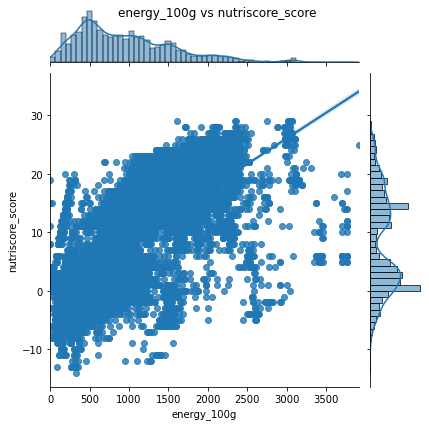

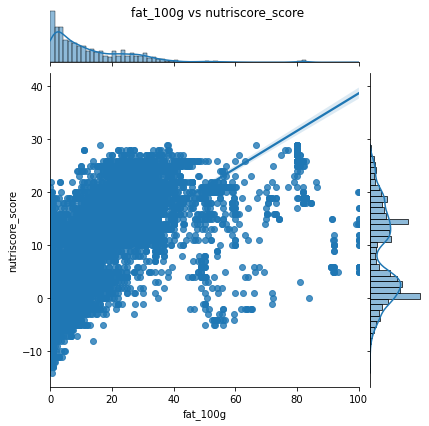

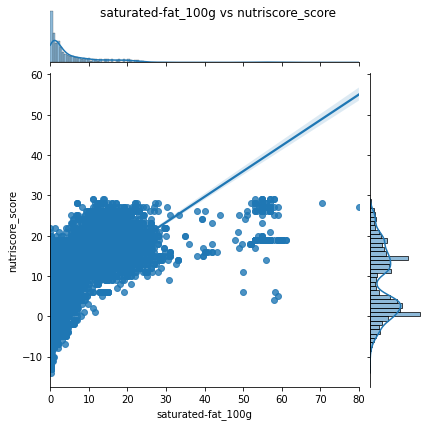

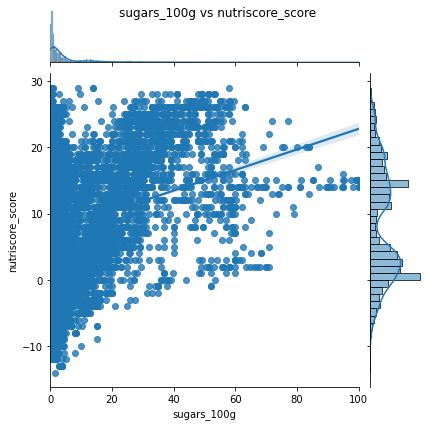

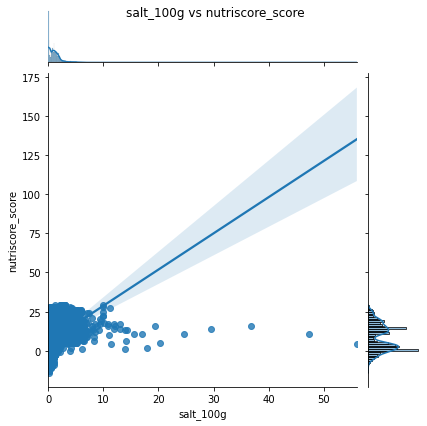

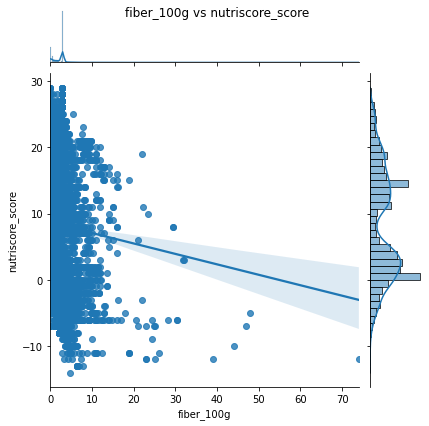

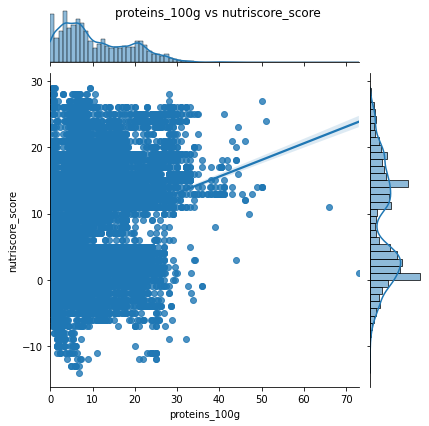

In [51]:
for col in cols:
    g_data = data.dropna(subset=[col,'nutriscore_score'])
    p = sns.jointplot(x=col, y='nutriscore_score', data=g_data, kind='reg')
    p.fig.suptitle('{} vs nutriscore_score'.format(col))

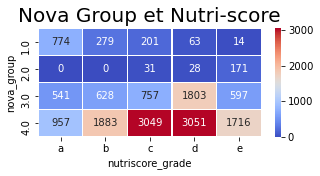

In [52]:
temp = data[data['nutriscore_grade'].isna() == False].copy()
temp['count']=1
p_ng_ns = temp.pivot_table(index=['nutriscore_grade'],columns=('nova_group'),values='count'
                           ,fill_value=0,aggfunc=np.sum).transpose()

plt.figure(figsize=(5,2))
plt.title("Nova Group et Nutri-score",size=20)
sns.heatmap(p_ng_ns,annot=True,fmt='.0f',linewidths=.3,annot_kws={"size": 10},cmap='coolwarm')
plt.show()

#### PNNS Groups

La colonne **pnns_groups_2** contient les catégories les plus récemment mises à jour.

In [53]:
data[data['nutriscore_score'].isna() == False]['pnns_groups_1'].dropna().value_counts()

Fish Meat Eggs             4099
Milk and dairy products    3816
Composite foods            3249
Sugary snacks              1259
Salty snacks               1018
Cereals and potatoes        914
Fruits and vegetables       658
Fat and sauces              589
unknown                     523
Beverages                   498
fruits-and-vegetables       149
sugary-snacks                88
cereals-and-potatoes          1
Name: pnns_groups_1, dtype: int64

In [54]:
data[data['nutriscore_score'].isna() == False]['pnns_groups_2'].dropna().value_counts()

One-dish meals                      2783
Processed meat                      2180
Cheese                              1696
Milk and yogurt                     1223
Fish and seafood                     967
Biscuits and cakes                   792
Meat                                 747
Dairy desserts                       736
Salty and fatty products             565
unknown                              523
Cereals                              500
Appetizers                           350
Dressings and sauces                 335
Vegetables                           320
Sandwiches                           277
Sweets                               254
Fats                                 254
Chocolate products                   213
Fruit juices                         212
Bread                                191
Pizza pies and quiche                189
Ice cream                            161
Fruits                               148
vegetables                           142
Sweetened bevera

In [55]:
data['pnns_groups_2'] = data['pnns_groups_2'].replace({
    'Pizza pies and quiches':'Pizza pies and quiche'})

Répartition des groupes PNN par rapport au Nutri-Score

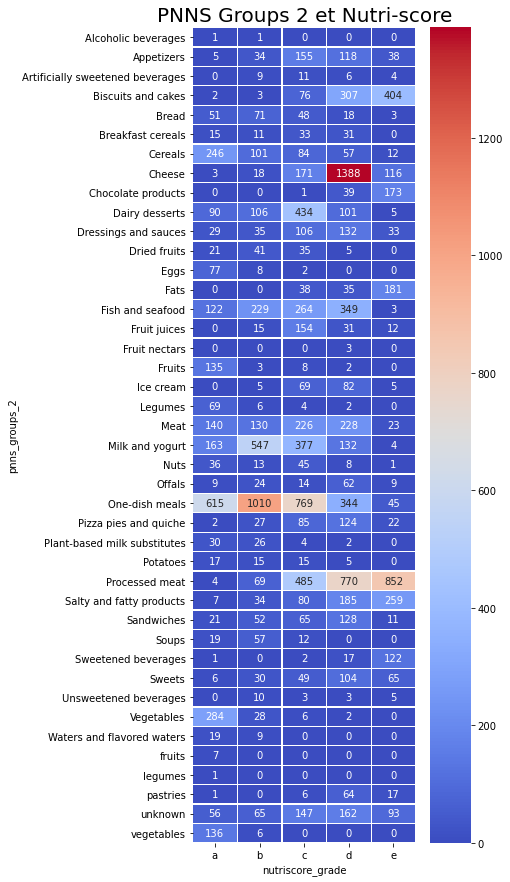

In [56]:
temp = data[data['nutriscore_grade'].isna() == False].copy()
temp['count']=1
p_pnn_ns = temp.pivot_table(index=['nutriscore_grade'],columns=('pnns_groups_2'),values='count'
                            ,fill_value=0,aggfunc=np.sum).transpose()

plt.figure(figsize=(5,15))
plt.title("PNNS Groups 2 et Nutri-score",size=20)
sns.heatmap(p_pnn_ns,annot=True,fmt='.0f',linewidths=.3,annot_kws={"size": 10},cmap='coolwarm')
plt.show()

Répartition des groupes PNN par rapport au Nova-group

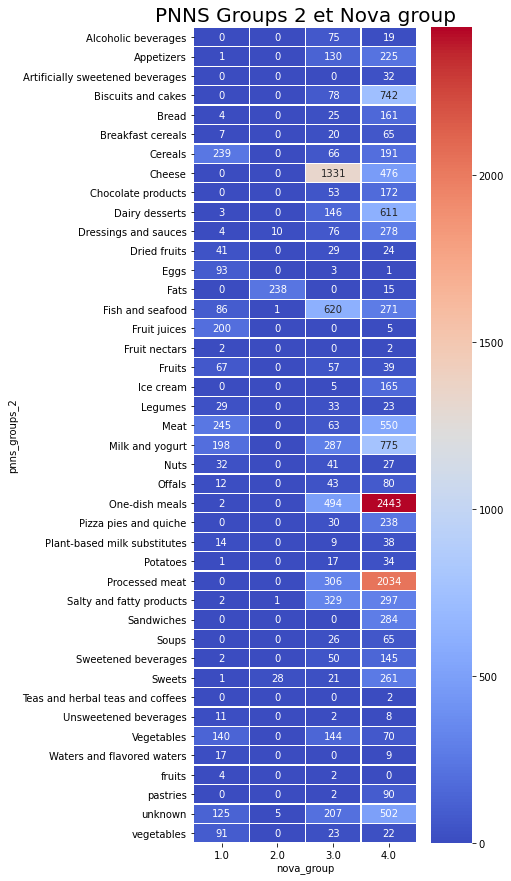

In [57]:
temp = data[data['nova_group'].isna() == False].copy()
temp['count']=1
p_pnn_ng = temp.pivot_table(index=['nova_group'],columns=('pnns_groups_2'),values='count'
                            ,fill_value=0,aggfunc=np.sum).transpose()

plt.figure(figsize=(5,15))
plt.title("PNNS Groups 2 et Nova group",size=20)
sns.heatmap(p_pnn_ng,annot=True,fmt='.0f',linewidths=.3,annot_kws={"size": 10},cmap='coolwarm')
plt.show()

In [58]:
he_pnn2 = pd.get_dummies(data['pnns_groups_2'], prefix='pnns2')
print(he_pnn2.shape)
he_pnn2.head()

(18967, 43)


pnns2_Alcoholic beverages  pnns2_Appetizers  \
0                          0                 0   
1                          0                 0   
2                          0                 0   
3                          0                 0   
4                          0                 0   

   pnns2_Artificially sweetened beverages  pnns2_Biscuits and cakes  \
0                                       0                         0   
1                                       0                         1   
2                                       0                         0   
3                                       0                         1   
4                                       0                         0   

   pnns2_Bread  pnns2_Breakfast cereals  pnns2_Cereals  pnns2_Cheese  \
0            0                        0              0             0   
1            0                        0              0             0   
2            0                        0              0             0   
3            0                        0              0             0   
4            0                        0              0             0   

   pnns2_Chocolate products  pnns2_Dairy desserts  pnns2_Dressings and sauces  \
0                         0                     1                           0   
1                         0                     0                           0   
2                         0                     0                           1   
3                         0                     0                           0   
4                         0                     0                           0   

   pnns2_Dried fruits  pnns2_Eggs  pnns2_Fats  pnns2_Fish and seafood  \
0                   0           0           0                       0   
1                   0           0           0                       0   
2                   0           0           0                       0   
3                   0           0           0                       0   
4                   0           0           0                       0   

   pnns2_Fruit juices  pnns2_Fruit nectars  pnns2_Fruits  pnns2_Ice cream  \
0                   0                    0             0                0   
1                   0                    0             0                0   
2                   0                    0             0                0   
3                   0                    0             0                0   
4                   0                    0             0                0   

   pnns2_Legumes  pnns2_Meat  pnns2_Milk and yogurt  pnns2_Nuts  pnns2_Offals  \
0              0           0                      0           0             0   
1              0           0                      0           0             0   
2              0           0                      0           0             0   
3              0           0                      0           0             0   
4              0           0                      0           0             0   

   pnns2_One-dish meals  pnns2_Pizza pies and quiche  \
0                     0                            0   
1                     0                            0   
2                     0                            0   
3                     0                            0   
4                     0                            0   

   pnns2_Plant-based milk substitutes  pnns2_Potatoes  pnns2_Processed meat  \
0                                   0               0                     0   
1                                   0               0                     0   
2                                   0               0                     0   
3                                   0               0                     0   
4                                   0               0                     0   

   pnns2_Salty and fatty products  pnns2_Sandwiches  pnns2_Soups  \
0                               0                 0            0   
1                 

In [59]:
data_he_pnn2 = pd.merge(data, he_pnn2, left_index=True, right_index=True)
data_he_pnn2.shape

(18967, 103)

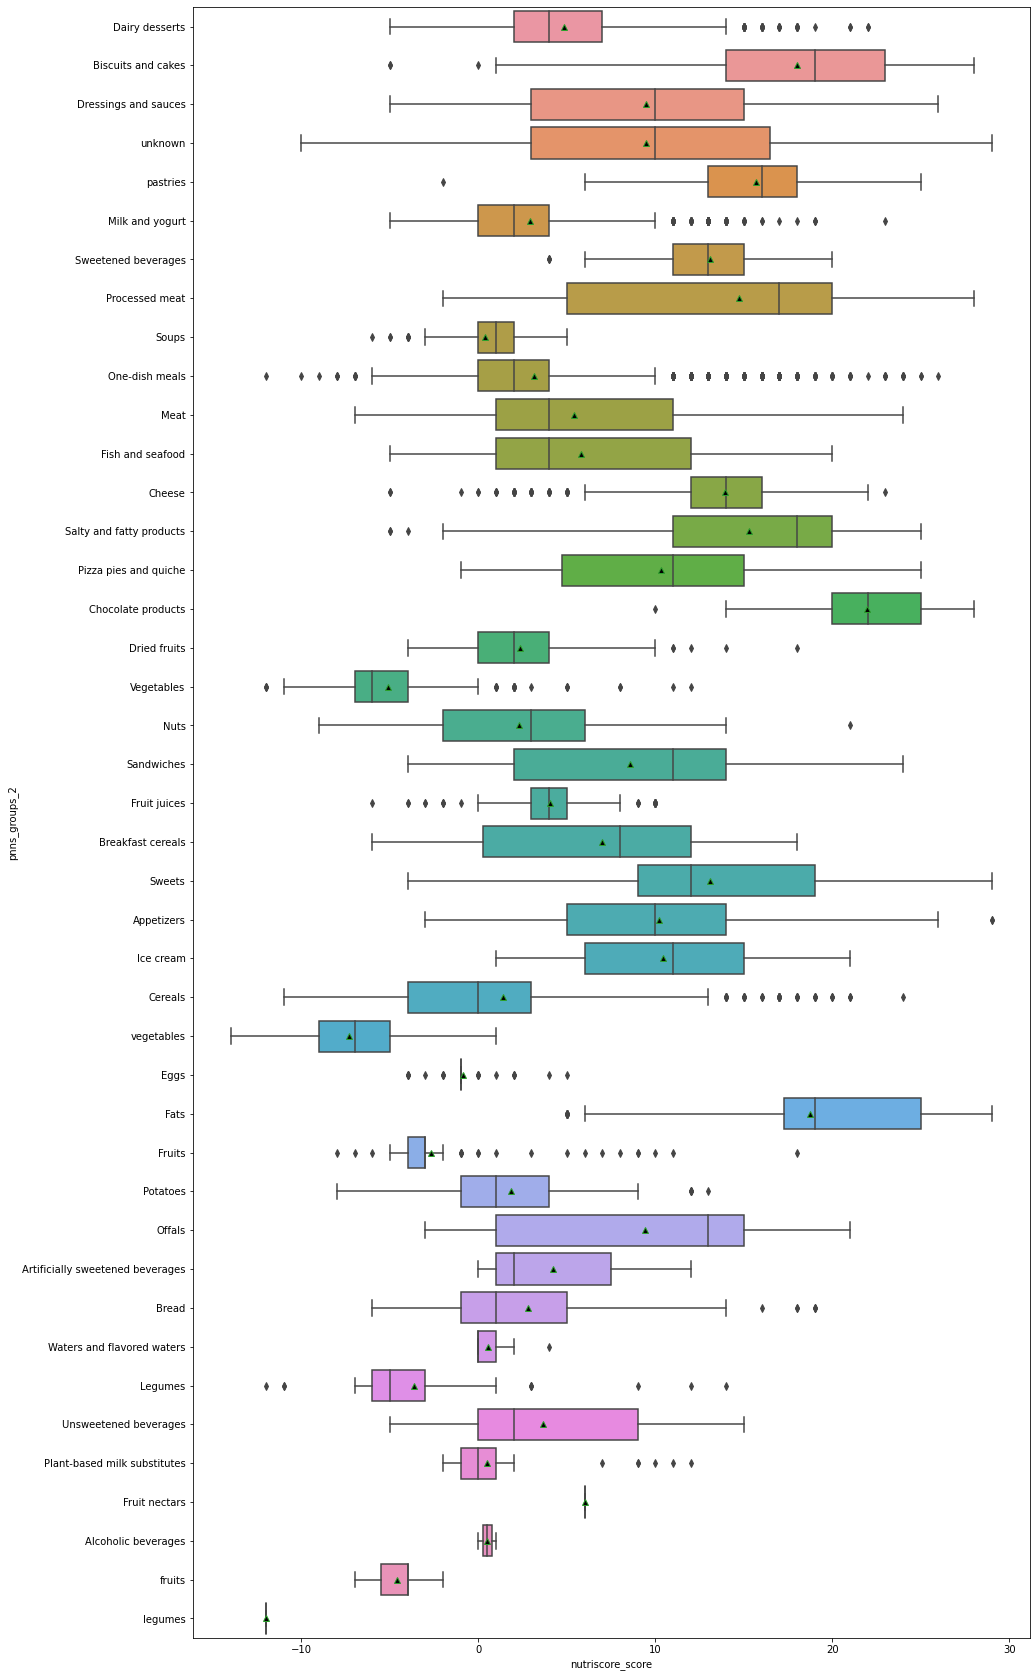

In [60]:
temp = data_he_pnn2[data_he_pnn2['nutriscore_score'].isna() == False].copy()
plt.figure(figsize=(15,30))
sns.boxplot(y='pnns_groups_2', x='nutriscore_score', data=temp, orient='h', 
            showmeans=True, meanprops={'markerfacecolor':'black'})
plt.show()

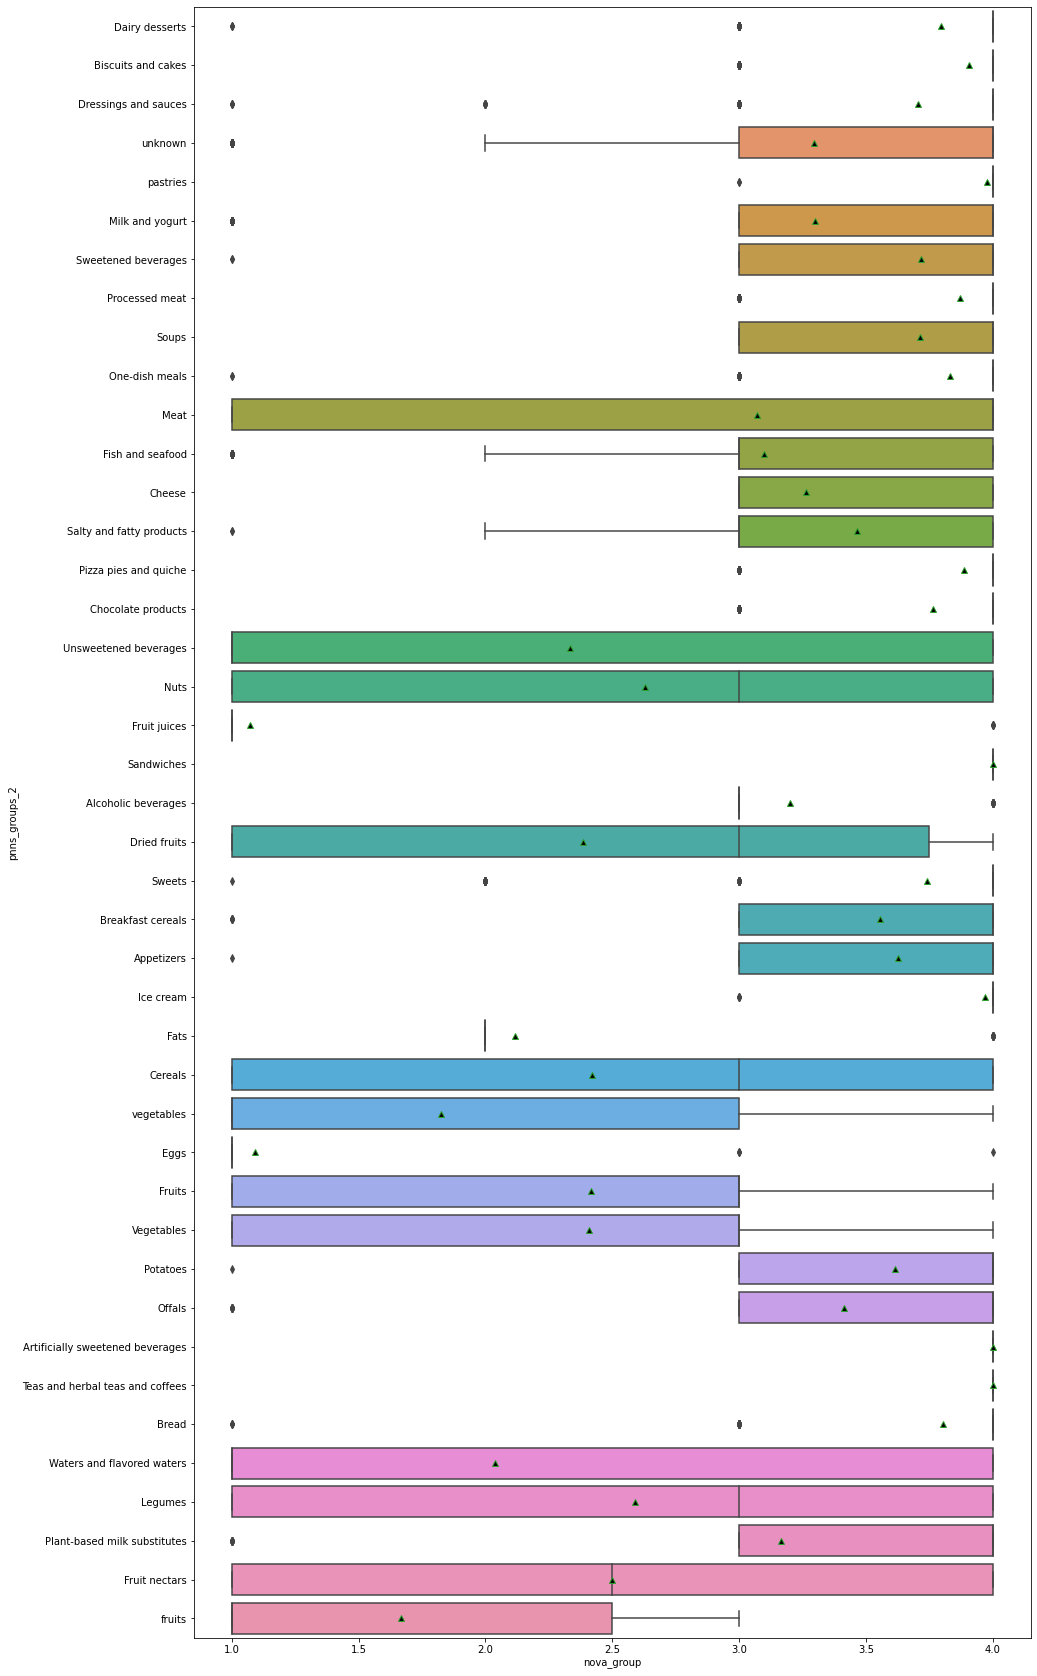

In [61]:
temp = data_he_pnn2[data_he_pnn2['nova_group'].isna() == False].copy()
plt.figure(figsize=(15,30))
sns.boxplot(y='pnns_groups_2', x='nova_group', data=temp, orient='h', 
            showmeans=True, meanprops={'markerfacecolor':'black'})
plt.show()

**Tentative de calcul du Nutri-Score et Nova-group avec sklearn :**

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
numCols_f = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'salt_100g', 'fiber_100g', 'proteins_100g',
            'nutriscore_score']

X = data[numCols_f].copy()
X.dropna(subset=numCols_f, inplace=True)
y = X['nutriscore_score']
X = X.drop(['nutriscore_score'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #42 the answer to life, the universe and everything

lReg = LinearRegression().fit(X_train, y_train)
print("R^2 sur le jeu d'entraînement :", lReg.score(X_train,y_train))
print('R^2 sur le jeu de test :', lReg.score(X_test,y_test))
print('Poids de chaque variable dans la régression :', lReg.coef_)
print("Ordonnée à l'origine", lReg.intercept_)

R^2 sur le jeu d'entraînement : 0.6786304320145546
R^2 sur le jeu de test : 0.6919150280664436
Poids de chaque variable dans la régression : [ 1.2520894   1.8231474   2.83981017  2.85727699  2.64319606 -1.01886553
  1.06364272]
Ordonnée à l'origine 8.276073170631323


Comme le *R-squared est 0.69*, le jeu de test n'est pas le meilleur mais il peut être accepté.

In [64]:
X = data[numCols].copy()
X.dropna(subset=numCols, inplace=True)
y = X['nova_group']
X = X.drop(['nova_group'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #42 the answer to life, the universe and everything

lReg = LinearRegression().fit(X_train, y_train)
print("R^2 sur le jeu d'entraînement :", lReg.score(X_train,y_train))
print('R^2 sur le jeu de test :', lReg.score(X_test,y_test))
print('Poids de chaque variable dans la régression :', lReg.coef_)
print("Ordonnée à l'origine", lReg.intercept_)

R^2 sur le jeu d'entraînement : 0.34687550304166426
R^2 sur le jeu de test : 0.3541245901940695
Poids de chaque variable dans la régression : [ 0.02741546  0.2030226   0.00456039 -0.00193141  0.25205144 -0.04786217
 -0.02878512  0.00329843 -0.13282719 -0.09830397  0.10041967  0.00300479
 -0.03501187  0.03926992  0.01111395 -0.16640472  0.24167099]
Ordonnée à l'origine 3.5395422361463207


Comme le *R-squared est 0.35*, le jeu de test est mauvais.

Prédiction Nutri-Score :

In [65]:
X = data[numCols_f].copy()
X.dropna(subset=numCols_f, inplace=True)
y = X['nutriscore_score']
X = X.drop(['nutriscore_score'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

lReg = LinearRegression().fit(X_train, y_train)

result = pd.DataFrame({'real_nutriscore_score': y_test,
                       'prediction': lReg.predict(X_test)}).reset_index()

In [66]:
result[['prediction','real_nutriscore_score']].describe()

prediction  real_nutriscore_score
count  4232.000000            4232.000000
mean      8.337187               8.209357
std       6.936973               8.394133
min     -10.110780             -14.000000
25%       3.343182               2.000000
50%       6.467851               6.000000
75%      12.634371              15.000000
max     101.512813              29.000000

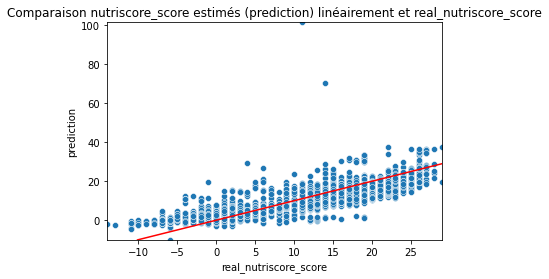

In [67]:
plt.title('Comparaison nutriscore_score estimés (prediction) linéairement et real_nutriscore_score')
sns.scatterplot(x=result['real_nutriscore_score'], y=result['prediction'])
sns.lineplot([result['prediction'].min(),result['prediction'].max()],
             [result['prediction'].min(),result['prediction'].max()], color='red')
ax = plt.gca()
ax.set_xlim(result['real_nutriscore_score'].min(),result['real_nutriscore_score'].max())
ax.set_ylim(result['prediction'].min(),result['prediction'].max())
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('root mean squared error : ',
      sqrt(mean_squared_error(y_true=result['real_nutriscore_score'], y_pred=result['prediction'])))

root mean squared error :  4.748810873912227


In [69]:
compare = abs(result['real_nutriscore_score'] - result['prediction'])
compare

0       11.575033
1        2.248370
2        3.463339
3        5.033594
4        4.036137
5        4.317465
6        0.628362
7        1.277956
8        1.278944
9        2.153130
10       1.947602
11       4.784261
12       3.578193
13       3.726366
14       2.894096
15       3.435778
16       5.275806
17       5.077129
18       0.440367
19       2.930673
20       3.175914
21       7.951876
22       0.859889
23       7.040797
24       0.479603
25       3.224751
26       5.227048
27       1.935563
28       1.082180
29       4.524876
30       2.397978
31       1.749018
32       0.955703
33       1.779040
34       7.689761
35       3.463190
36       6.749380
37       3.482567
38       2.045204
39       0.360951
40      12.401456
41       0.333928
42       2.707937
43       0.734964
44       0.588165
45       7.809857
46       2.817579
47       0.086089
48       0.208950
49       4.429903
50       0.569802
51       6.671208
52       3.718945
53       3.424848
54       6.726001
55       4

In [70]:
compare.sum()/len(compare)

3.5409909915137527

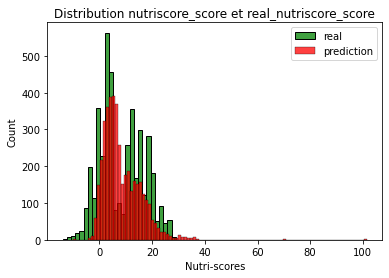

In [71]:
plt.title('Distribution nutriscore_score et real_nutriscore_score')
sns.histplot(result['real_nutriscore_score'], color='green')
sns.histplot(result['prediction'], color='red')
plt.legend(['real','prediction'])
plt.xlabel('Nutri-scores')
plt.show()

In [72]:
pertinence = pd.DataFrame()
pertinence['coefs'] = lReg.coef_.T
pertinence

coefs
0  1.268443
1  1.741165
2  2.729919
3  2.891603
4  3.006615
5 -1.037146
6  0.955103

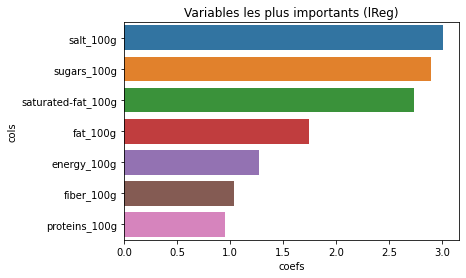

In [73]:
pertinence['cols'] = data[numCols_f].drop(['nutriscore_score'], axis=1).columns.tolist()
pertinence['coefs'] = abs(pertinence['coefs'])
pertinence.sort_values(by='coefs', inplace=True, ascending=False)

plt.title('Variables les plus importants (lReg)')
sns.barplot(x=pertinence['coefs'], y=pertinence['cols'])
plt.show()

Même si le modèle est relativement pertinent (*R-squared* ~0.7), compte tenu des connaissances acquises au moment de la réalisation de ce Projet, il n'est pas possible de déterminer les causes de l'écart entre la prédiction du Nutri-Score et sa valeur réelle.

Pour le moment, les valeurs à utiliser seront approximées comme suit :

- Pour chaque groupe PNNS, son *grade* de Nutri-Score sera calculée en prenant la moyenne des scores en effectuant un filtre sur la colonne des scores avec les groupes PNNS comme condition. Les résultats obtenus sont très similaires à ceux représentés dans le heatmap *PNNS Groupes 2 et Nutri-score*
- Les nutriments correspondant à chaque groupe PNNS sont calculés avec les mêmes critères que le Nutri-Score détaillé ci-dessus.

Pour les Apports Journaliers Recommandes (AJR), les valeurs de référence suivantes seront prises en compte :
- Énergie 8400kJ (2000 kcal)
- Matières Grasses Totales 70g
- Acides Gras Saturés 20g
- Glucides 260g (carbohydrates)
- Sucres 90g
- Protéines 50g
- Sel 6g -> sodium = sel/2.5x1000 mg

Ceux-ci sont représentés dans les colonnes suivantes : 
- 'energy-kcal_100g' 
- 'fat_100g'
- 'saturated-fat_100g'
- 'carbohydrates_100g'
- 'sugars_100g'
- 'proteins_100g'
- 'salt_100g'

Source des AJR :
- https://fr.wikipedia.org/wiki/Apports_journaliers_recommand%C3%A9s
- https://www.cerin.org/glossaire/apports-journaliers-recommandes-ou-de-reference/

In [74]:
#Correction of category error
data['pnns_groups_2'] = data['pnns_groups_2'].replace({
    'Pizza pies and quiches':'Pizza pies and quiche'})
data['pnns_groups_2'] = data['pnns_groups_2'].str.lower()

In [75]:
#https://www.researchgate.net/figure/Calcul-de-lalgorithme-du-Nutri-Score-le-score-FRSm-HCSP_fig1_328136107
#https://nutriscore.colruytgroup.com/colruytgroup/fr/propos-du-nutri-score/
#Nutriscore ranges values

nutrisranges = pd.DataFrame({'score_min':[-15,0,3,11,19],
                             'score_max':[-1,2,10,18,40],
                             'grade':['A','B','C','D','E']})

nutrisranges_boisson = pd.DataFrame({'score_min':['water',-15,2,6,10],
                                     'score_max':['water',1,5,9,40],
                                     'grade':['A','B','C','D','E']})
kwords_boisson = ['beverages','juices','teas and coffees','waters','nectars']

pnn_avgs = pd.DataFrame(columns=['pnns_group','avg_score','avg_grade',
                                 'energy-kcal_100g','fat_100g','saturated-fat_100g',
                                 'carbohydrates_100g','sugars_100g','proteins_100g','salt_100g'])
pnn_avgs['pnns_group'] = {pnn: data.loc[data['pnns_groups_2'] == pnn]['pnns_groups_2'] for pnn in data['pnns_groups_2'].unique().tolist()}
pnn_avgs.reset_index(drop=True, inplace=True)

for index, elem in pnn_avgs.iterrows():
    pnn_avgs.at[index,'avg_score'] = data.loc[data['pnns_groups_2'].values == elem[0],'nutriscore_score'].dropna().mean()
    for keyw in kwords_boisson:
        if keyw in pnn_avgs.at[index,'pnns_group']:
                            if (pnn_avgs.at[index,'avg_score'] == nutrisranges_boisson.at[0,'score_min']):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges_boisson.at[0,'grade']
                            elif ((pnn_avgs.at[index,'avg_score'] >= nutrisranges_boisson.at[1,'score_min']) and (pnn_avgs.at[index,'avg_score'] < nutrisranges_boisson.at[2,'score_min'])):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges_boisson.at[1,'grade']
                            elif ((pnn_avgs.at[index,'avg_score'] >= nutrisranges_boisson.at[2,'score_min']) and (pnn_avgs.at[index,'avg_score'] < nutrisranges_boisson.at[3,'score_min'])):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges_boisson.at[2,'grade']
                            elif ((pnn_avgs.at[index,'avg_score'] >= nutrisranges_boisson.at[3,'score_min']) and (pnn_avgs.at[index,'avg_score'] < nutrisranges_boisson.at[4,'score_min'])):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges_boisson.at[3,'grade']
                            elif ((pnn_avgs.at[index,'avg_score'] >= nutrisranges_boisson.at[4,'score_min']) and (pnn_avgs.at[index,'avg_score'] < nutrisranges_boisson.at[4,'score_max'])):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges_boisson.at[4,'grade']
                            else: pnn_avgs.at[index,'avg_grade'] = 'error'
        else:
                            if ((pnn_avgs.at[index,'avg_score'] >= nutrisranges.at[0,'score_min']) and (pnn_avgs.at[index,'avg_score'] < nutrisranges.at[1,'score_min'])):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges.at[0,'grade']
                            elif ((pnn_avgs.at[index,'avg_score'] >= nutrisranges.at[1,'score_min']) and (pnn_avgs.at[index,'avg_score'] < nutrisranges.at[2,'score_min'])):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges.at[1,'grade']
                            elif ((pnn_avgs.at[index,'avg_score'] >= nutrisranges.at[2,'score_min']) and (pnn_avgs.at[index,'avg_score'] < nutrisranges.at[3,'score_min'])):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges.at[2,'grade']
                            elif ((pnn_avgs.at[index,'avg_score'] >= nutrisranges.at[3,'score_min']) and (pnn_avgs.at[index,'avg_score'] < nutrisranges.at[4,'score_min'])):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges.at[3,'grade']
                            elif ((pnn_avgs.at[index,'avg_score'] >= nutrisranges.at[4,'score_min']) and (pnn_avgs.at[index,'avg_score'] < nutrisranges.at[4,'score_max'])):
                                pnn_avgs.at[index,'avg_grade'] = nutrisranges.at[4,'grade']
                            else: pnn_avgs.at[index,'avg_grade'] = 'error'

loopList = ['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']
for index, elem in pnn_avgs.iterrows():
    for column in loopList:
        pnn_avgs.at[index,column] = data.loc[data['pnns_groups_2'].values == elem[0],column].dropna().mean()

**INPUT**

**MODIFY INDICATOR COLUMN RESPECTING THE PNNS CATEGORIES**

**QUANTITIES ARE IN GRAMS, EACH VALUE REPRESENTS THE AMOUNT OF THE SAME INDEX CATEGORY**

**CATEGORIES AND VALUES MUST HAVE THE SAME LENGTH, IF NOT THE CODE CRASHES**

In [76]:
df_input = pd.DataFrame(columns=['indicator','quantity_g'])
df_input['indicator'] = ['sweets','legumes','bread','pastries']
df_input['quantity_g'] = ['50','200','200','300']

In [77]:
def analyseInput(df_input,pnn_avgs):
    """
    - Énergie 8400kJ (2000 kcal)
    - Matières Grasses Totales 70g
    - Acides Gras Saturés 20g
    - Glucides 260g (carbohydrates)
    - Sucres 90g
    - Protéines 50g
    - Sel 6g -> sodium = sel/2.5x1000 mg

    https://fr.wikipedia.org/wiki/Apports_journaliers_recommand%C3%A9s

    https://www.cerin.org/glossaire/apports-journaliers-recommandes-ou-de-reference/
    """
    
    loopList = ['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g',
                'sugars_100g','proteins_100g','salt_100g']
    
    dailyStatus = pnn_avgs.copy()
    for col in loopList:
        dailyStatus[col].values[:] = 0
    
    for index, value in df_input.iterrows(): #loop df with input by rows
        for i_pnn, pnn_g in pnn_avgs.iterrows(): #loop df with avgs be row
            if df_input.at[index,'indicator'] == pnn_g[0]: #if the input category is the same as the row inthe avg df...
                if int(df_input.at[index,'quantity_g']) <= 100: #if the input quantity is <= 100g
                    for c_pnn in loopList: #loop nutrients categories
                        for c_daily in dailyStatus.columns: #loop daily df columns
                            if c_daily == c_pnn:
                                dailyStatus.loc[dailyStatus.index[i_pnn],c_pnn] += pnn_avgs.loc[pnn_avgs.index[i_pnn],c_pnn]  
            
                elif int(df_input.at[index,'quantity_g']) > 100:
                    for c_pnn in loopList: #loop nutrients categories
                        for c_daily in dailyStatus.columns: #loop daily df columns
                            if c_daily == c_pnn:
                                q1_temp = float(df_input.loc[df_input.index[index],'quantity_g'])
                                q0_temp = float(pnn_avgs.loc[pnn_avgs.index[i_pnn],c_pnn])
                                q_temp = q1_temp*q0_temp/100
                                dailyStatus.loc[dailyStatus.index[i_pnn],c_pnn] += q_temp
                else:
                    print('error')
    
    dailyStatus[loopList]=round(dailyStatus[loopList].astype(float),2)
    dailyStatus.loc['Cols_Total']= round(dailyStatus.sum(numeric_only=True, axis=0),2)
             
    return dailyStatus

In [78]:
dailyStatus = analyseInput(df_input,pnn_avgs)

In [79]:
def dailyCheck(dailyStatus):
    loopList = ['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g',
                'sugars_100g','proteins_100g','salt_100g']
    
    df_ajr = pd.DataFrame({'nutriments':['energy-kcal_100g','fat_100g','saturated-fat_100g',
                                         'carbohydrates_100g','sugars_100g','proteins_100g',
                                         'salt_100g'],
                           'valeurs':[2000,70,20,260,90,50,6]})
    
    resultStatus = dailyStatus.tail(1).copy()
    resultStatus.drop([resultStatus.columns[0],resultStatus.columns[1],resultStatus.columns[2]
                      ],axis=1,inplace=True)
    resultStatus.reset_index(drop=True, inplace=True)

    for colRS in resultStatus.columns.tolist():
        for index, rowAJR in df_ajr.iterrows():
            if colRS == rowAJR[0]:
                if resultStatus.at[0,colRS] <= df_ajr.at[index,'valeurs']:
                    resultStatus.loc[1,colRS] = 'OK'
                else:
                    resultStatus.loc[1,colRS] = 'NOPE'
    
    return resultStatus

**OUTPUT FOR THE USER**

In [80]:
resultStatus = dailyCheck(dailyStatus)
resultStatus

energy-kcal_100g fat_100g saturated-fat_100g carbohydrates_100g sugars_100g  \
0          2424.65    69.28              29.55             360.22       105.6   
1             NOPE       OK               NOPE               NOPE        NOPE   

  proteins_100g salt_100g  
0         73.85      6.51  
1          NOPE      NOPE

#### Conseils
Calorias (kcal)
- 40 à 55% glucides, essentiellement céréales, féculents et pour partie fruits et légumes (les sucres étant marginalisés)
- 35 à 40% lipides (de graisses)
- 10 à 20% protéines (animales ou végetales)

Augmenter
- Fruits et légumes (au moins 5 par jour: comme 3 légumes et 2 fruits) frais, surgelés ou conserve
- Légumes secs (au moins 2 fois par semaine) au sein de la catégorie des aliments protéinés
- Fruits à coque et la cuisine faite maison

Aller vers
- Poisson (2 fois par semaine), grais et maigre en alternance
- Des produits céréaliers complets à chaque repas
- Matières grasses ajoutées en petite quantité (se tourner vers les huiles d'olive, de colza et de noix) (oméga-3 au profit de oméga-6)
- Aliments locaux et de saison
- Produits laitiers (2 par jour) mais limitée (lieux une alternative végétale riche en calcium)
- Bio

Réduire
- Viande (500g max par semaine), charcuterie (150g max par semaine), sucrés (&à% des appports totaux) et boissons sucrées (200ml par jour)
- L'alcool (2 verres standard max par jour et pas chaque jour)
- Gras, salés et sucrés
- Ultra-transformés: éviter
- D et E par Nutri-score

Sources:
- https://www.researchgate.net/figure/Calcul-de-lalgorithme-du-Nutri-Score-le-score-FRSm-HCSP_fig1_328136107
- https://www.lanutrition.fr/bien-dans-son-assiette/bien-manger/les-recommandations-de-lanutrition.fr/les-recommandations-nutritionnelles-officielles
- https://www.mangerbouger.fr/